In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.layers import Embedding,dot,Dot
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from tensorflow.keras.layers import Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

/Users/ayahassan/opt/anaconda3/envs/tensorflow3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)
tf.keras.utils.set_random_seed(
    2
)

In [5]:
dtf_products = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/goodreads_10k/books.csv")
print(dtf_products.shape)

(10000, 23)


In [6]:
# dtf_products.drop_duplicates(keep='first')
dtf_products.drop_duplicates(subset=['title','authors'],keep='first',inplace=True)
print(dtf_products.shape)

(10000, 23)


In [7]:
df = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/ratings.csv",low_memory=False)
print(df.head(10))
print(df.shape)
#remove duplicate ratings for the same book by the same user
df = df.drop_duplicates(
  subset = ['user_id', 'book_id'],
  keep = 'first').reset_index(drop = True)
print(df.shape)




   user_id  book_id  rating
0        1      258       5
1        2     4081       4
2        2      260       5
3        2     9296       5
4        2     2318       3
5        2       26       4
6        2      315       3
7        2       33       4
8        2      301       5
9        2     2686       5
(5976479, 3)
(5976479, 3)


In [8]:
# drop the row if it has at least one NaN value
df.dropna(axis=0)
print(df.shape)

(5976479, 3)


In [9]:
X_book, X_user,y_old = df.values[:,1],df.values[:,0],df.values[:,2] 
user_ids = np.unique(X_user).tolist()
book_ids = np.unique(X_book).tolist()
num_users = len(user_ids)
num_books = len(book_ids)
print(X_book.shape)
print(X_user.shape)
print (num_books)
print (num_users)
print(y_old.shape)

(5976479,)
(5976479,)
10000
53424
(5976479,)


In [10]:
min_rating = min(y_old)
max_rating = max(y_old)
print(
    "Number of distinct users: {}, Number of distinct books: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_books, min_rating, max_rating
    )
)
X = df[["book_id","user_id"]].values
# xmax, ymax = X.max(axis=0)
# print(f"X max, y max {xmax} {ymax}")
# print(df.max())
# print(df.min())
print(X)
print(y_old.shape)
print(X.shape)


Number of distinct users: 53424, Number of distinct books: 10000, Min rating: 1, Max rating: 5
[[  258     1]
 [ 4081     2]
 [  260     2]
 ...
 [  722 49925]
 [  949 49925]
 [ 1023 49925]]
(5976479,)
(5976479, 2)


In [11]:
# print(len(df[df["user"] == 1]))
dictionary={}
for i in user_ids:
    dictionary[i] = len(df[df["user_id"] == i])


In [12]:
print(dictionary)

{1: 117, 2: 65, 3: 91, 4: 134, 5: 100, 6: 90, 7: 155, 8: 98, 9: 132, 10: 128, 11: 120, 12: 113, 13: 96, 14: 108, 15: 97, 16: 68, 17: 61, 18: 109, 19: 119, 20: 90, 21: 61, 22: 120, 23: 127, 24: 128, 25: 60, 26: 103, 27: 121, 28: 120, 29: 98, 30: 92, 31: 121, 32: 123, 33: 99, 34: 101, 35: 176, 36: 136, 37: 81, 38: 61, 39: 91, 40: 129, 41: 149, 42: 54, 43: 103, 44: 129, 45: 45, 46: 119, 47: 133, 48: 80, 49: 133, 50: 106, 51: 116, 52: 114, 53: 49, 54: 121, 55: 127, 56: 95, 57: 113, 58: 82, 59: 66, 60: 122, 61: 139, 62: 110, 63: 70, 64: 89, 65: 109, 66: 70, 67: 104, 68: 51, 69: 91, 70: 63, 71: 98, 72: 109, 73: 105, 74: 62, 75: 163, 76: 109, 77: 64, 78: 74, 79: 123, 80: 64, 81: 100, 82: 133, 83: 95, 84: 86, 85: 114, 86: 70, 87: 114, 88: 128, 89: 149, 90: 107, 91: 62, 92: 101, 93: 119, 94: 57, 95: 132, 96: 119, 97: 103, 98: 96, 99: 86, 100: 80, 101: 114, 102: 76, 103: 107, 104: 123, 105: 127, 106: 71, 107: 123, 108: 104, 109: 132, 110: 68, 111: 128, 112: 103, 113: 105, 114: 67, 115: 85, 116: 

In [13]:
# plt.bar(dictionary.keys(), dictionary.values(), 120, color='g')

In [14]:
filtered_vals = [v for k, v in dictionary.items() if v != 0]
average = sum(filtered_vals) / len(filtered_vals)
print(average)
print(max(dictionary.values()))
print(min(dictionary.values()))

111.86880428271938
200
19


In [15]:
cleaning_list = []
less = 0
more = 0
print(len(dictionary))
for k in dictionary:
    if (dictionary[k] > 50):
        more+=1
    else:
        less+=1
        cleaning_list.append(k)
        
print(more)
print(less)
print(len(cleaning_list))


53424
52485
939
939


In [16]:
print(df.shape)

(5976479, 3)


In [17]:
df = df[~df['user_id'].isin(cleaning_list)]
print(df.shape)
df.head()

(5940836, 3)


,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [18]:
df.to_csv("my_paid.csv")

In [19]:
df.shape

(5940836, 3)

In [20]:
X_book, X_user,y_old = df.values[:,1],df.values[:,0],df.values[:,2] 
print(X_book.shape)
print(X_user.shape)
print (y_old)
print(y_old.shape)
user_ids = np.unique(X_user).tolist()
book_ids = np.unique(X_book).tolist()
num_users = len(user_ids)
num_books = len(book_ids)
print(f"{num_books} unique books, {num_users} unique users")

(5940836,)
(5940836,)
[5 4 5 ... 4 5 4]
(5940836,)
10000 unique books, 52485 unique users


In [21]:
min_rating = min(y_old)
max_rating = max(y_old)
print(
    "Number of distinct users: {}, Number of distinct books: {}, Min rating: {}, Max rating: {}".format(
        num_users, num_books, min_rating, max_rating
    )
)
book2book_encoded = {x: i for i, x in enumerate(book_ids)}
bookencoded2book = {i: x for i, x in enumerate(book_ids)}
user2user_encoded = {x: i for i, x in enumerate(user_ids)}
userencoded2user = {i: x for i, x in enumerate(user_ids)}
df["book"] = df['book_id'].map(book2book_encoded)
df["user"] = df['user_id'].map(user2user_encoded)
book_id_temp = df["book_id"].values
X = df[["book","user"]].values
xmax, ymax = X.max(axis=0)
print(f"mapped books and users maximum {xmax} {ymax}")
print(df.max())
print(df.min())
print(book_id_temp)
print(book_id_temp.shape)
print(X.shape)
print(X)


Number of distinct users: 52485, Number of distinct books: 10000, Min rating: 1, Max rating: 5
mapped books and users maximum 9999 52484
user_id    53424
book_id    10000
rating         5
book        9999
user       52484
dtype: int64
user_id    1
book_id    1
rating     1
book       0
user       0
dtype: int64
[ 258 4081  260 ...  722  949 1023]
(5940836,)
(5940836, 2)
[[  257     0]
 [ 4080     1]
 [  259     1]
 ...
 [  721 49051]
 [  948 49051]
 [ 1022 49051]]


In [22]:
userencoded2user

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26,
 26: 27,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 34,
 34: 35,
 35: 36,
 36: 37,
 37: 38,
 38: 39,
 39: 40,
 40: 41,
 41: 42,
 42: 43,
 43: 44,
 44: 46,
 45: 47,
 46: 48,
 47: 49,
 48: 50,
 49: 51,
 50: 52,
 51: 54,
 52: 55,
 53: 56,
 54: 57,
 55: 58,
 56: 59,
 57: 60,
 58: 61,
 59: 62,
 60: 63,
 61: 64,
 62: 65,
 63: 66,
 64: 67,
 65: 68,
 66: 69,
 67: 70,
 68: 71,
 69: 72,
 70: 73,
 71: 74,
 72: 75,
 73: 76,
 74: 77,
 75: 78,
 76: 79,
 77: 80,
 78: 81,
 79: 82,
 80: 83,
 81: 84,
 82: 85,
 83: 86,
 84: 87,
 85: 88,
 86: 89,
 87: 90,
 88: 91,
 89: 92,
 90: 93,
 91: 94,
 92: 95,
 93: 96,
 94: 97,
 95: 98,
 96: 99,
 97: 100,
 98: 101,
 99: 102,
 100: 103,
 101: 104,
 102: 105,
 103: 106,
 104: 107,
 105: 108,
 106: 109,
 107: 110,
 108: 111,
 109: 112,
 110: 

In [23]:
df_book2book_encoded = pd.DataFrame({"A":book2book_encoded.keys(), "B": book2book_encoded.values()})
df_bookencoded2book = pd.DataFrame.from_dict({"A":bookencoded2book.keys(), "B": bookencoded2book.values()})
df_user2user_encoded = pd.DataFrame.from_dict({"A":user2user_encoded.keys(), "B": user2user_encoded.values()})
df_userencoded2user = pd.DataFrame.from_dict({"A": userencoded2user.keys(), "B": userencoded2user.values()})

df_book2book_encoded.to_csv("df_book2book_encoded.csv")
df_bookencoded2book.to_csv("df_bookencoded2book.csv")
df_user2user_encoded.to_csv("df_user2user_encoded.csv")
df_userencoded2user.to_csv("df_userencoded2user.csv")

## Calculating the avg Rating  per user

In [24]:
user_ids_after_mapping = np.unique(df['user']).tolist()

In [25]:
user_avg = {}
for i in user_ids_after_mapping:
    avg = 0
    temp = df[df['user'] == i]
    for j in temp["rating"]:
        avg = avg+j
    user_avg[i] = avg/temp.shape[0]

In [26]:
user_avg

{0: 3.58974358974359,
 1: 4.415384615384616,
 2: 1.7362637362637363,
 3: 3.7686567164179103,
 4: 4.04,
 5: 4.322222222222222,
 6: 3.8193548387096774,
 7: 3.5714285714285716,
 8: 3.446969696969697,
 9: 3.75,
 10: 3.591666666666667,
 11: 3.8672566371681416,
 12: 4.197916666666667,
 13: 3.509259259259259,
 14: 4.319587628865979,
 15: 3.735294117647059,
 16: 4.016393442622951,
 17: 3.4220183486238533,
 18: 3.4201680672268906,
 19: 4.211111111111111,
 20: 3.3114754098360657,
 21: 3.625,
 22: 3.3307086614173227,
 23: 3.71875,
 24: 4.016666666666667,
 25: 3.9902912621359223,
 26: 3.87603305785124,
 27: 4.008333333333334,
 28: 4.244897959183674,
 29: 4.163043478260869,
 30: 3.5041322314049586,
 31: 3.983739837398374,
 32: 4.444444444444445,
 33: 3.792079207920792,
 34: 3.1136363636363638,
 35: 3.676470588235294,
 36: 4.308641975308642,
 37: 3.5081967213114753,
 38: 3.4945054945054945,
 39: 3.8449612403100777,
 40: 4.295302013422819,
 41: 3.7962962962962963,
 42: 3.5825242718446604,
 43: 3.8604

In [27]:
y_old = df["rating"].values

In [28]:
# global_avg = 0
# for i in range(len(X)):
#     global_avg += dtf_products[dtf_products['id'] == y_temp[i]]["average_rating"]
# global_avg/len(X)

In [29]:
print(max(user_avg.values()))
print(min(user_avg.values()))

5.0
1.0


In [30]:
print(y_old)

[5 4 5 ... 4 5 4]


In [31]:
df.to_csv("df_paid_onwebsite.csv")

# Normalize the ratings

In [32]:
y = np.zeros((len(X),), dtype=float)
# y[i]-user_avg[X[i][1]]-dtf_products.[dtf_products['id'] == y_temp[i]]["average_rating"]
for i in range(len(X)):
    y[i] = y_old[i] - user_avg[X[i][1]]
# y = df["rating"].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values


In [33]:
print(y[:200])

[ 1.41025641 -0.41538462  0.58461538  0.58461538 -1.41538462 -0.41538462
 -1.41538462 -0.41538462  0.58461538  0.58461538  0.58461538  0.58461538
  0.23134328 -0.76865672  0.23134328  1.23134328  1.23134328  1.23134328
  1.23134328  1.23134328  1.23134328  0.23134328  1.23134328 -1.76865672
  1.23134328 -0.76865672  0.23134328 -0.76865672  0.23134328  0.23134328
 -0.76865672 -0.76865672 -1.76865672  0.23134328  0.23134328  0.23134328
  0.23134328  0.23134328  0.23134328  0.23134328  0.23134328  1.23134328
 -0.76865672 -0.32222222  1.42857143 -0.57142857  0.42857143  1.42857143
  0.42857143  0.42857143  1.42857143  1.42857143  0.42857143  1.42857143
  1.42857143  1.42857143  0.42857143  1.42857143 -0.57142857  1.42857143
  1.42857143 -0.57142857  1.42857143  1.42857143  1.23134328 -1.76865672
  1.23134328  1.23134328  0.23134328  0.23134328  0.23134328 -0.76865672
  1.23134328 -0.76865672  0.23134328 -0.58974359 -0.58974359 -0.58974359
  1.41025641 -0.58974359 -0.58974359 -0.58974359 -0

In [34]:
print(y_old[:200])

[5 4 5 5 3 4 3 4 5 5 5 5 4 3 4 5 5 5 5 5 5 4 5 2 5 3 4 3 4 4 3 3 2 4 4 4 4
 4 4 4 4 5 3 4 5 3 4 5 4 4 5 5 4 5 5 5 4 5 3 5 5 3 5 5 5 2 5 5 4 4 4 3 5 3
 4 3 3 3 5 3 3 3 3 4 5 4 4 4 3 3 5 4 4 4 4 4 3 4 4 4 4 5 4 3 3 3 3 3 4 5 4
 4 5 4 4 5 4 4 3 2 1 1 5 2 3 4 5 4 2 1 5 5 4 5 5 4 5 3 2 2 2 2 2 2 2 2 2 2
 2 4 4 2 2 5 2 5 4 4 2 4 5 5 3 3 3 4 3 4 3 3 5 3 4 5 5 4 3 4 3 3 4 4 5 4 5
 4 4 5 3 4 5 4 4 3 5 4 5 3 4 4]


In [35]:
print(X[:200])

[[ 257    0]
 [4080    1]
 [ 259    1]
 [9295    1]
 [2317    1]
 [  25    1]
 [ 314    1]
 [  32    1]
 [ 300    1]
 [2685    1]
 [3752    1]
 [8518    1]
 [  69    3]
 [ 263    3]
 [ 387    3]
 [  17    3]
 [  26    3]
 [  20    3]
 [   1    3]
 [  22    3]
 [  23    3]
 [ 963    3]
 [ 102    3]
 [ 254    3]
 [  34    3]
 [ 286    3]
 [ 336    3]
 [  25    3]
 [  83    3]
 [  57    3]
 [1116    3]
 [ 659    3]
 [ 110    3]
 [   4    3]
 [ 412    3]
 [   7    3]
 [2171    3]
 [  64    3]
 [ 296    3]
 [  44    3]
 [ 112    3]
 [ 324    3]
 [ 475    3]
 [6350    5]
 [2731    7]
 [1431    7]
 [ 478    7]
 [3019    7]
 [6194    7]
 [ 613    7]
 [4621    7]
 [9113    7]
 [ 193    7]
 [  13    7]
 [2583    7]
 [  54    7]
 [ 771    7]
 [ 777    7]
 [1936    7]
 [ 492    7]
 [ 361    7]
 [1966    7]
 [ 528    7]
 [5424    7]
 [1236    3]
 [ 144    3]
 [  35    3]
 [ 101    3]
 [ 221    3]
 [ 199    3]
 [  12    3]
 [ 639    3]
 [ 692    3]
 [ 574    3]
 [  54    3]
 [ 267    0]
 [5555    0]

In [36]:
print(user_avg[14])

4.319587628865979


In [37]:
# print(list(user_avg.keys())[list(user_avg.values()).index(5)])
# print(user_avg[4874])
# print(list(user_avg.keys())[list(user_avg.values()).index(1)])
# print(user_avg[35756])

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print(X_train.shape)
print(X_test.shape)

(4752668, 2)
(1188168, 2)


In [39]:
print(y_train)

[ 0.70895522 -0.25925926 -3.34065934 ... -0.09565217  0.64485981
  0.53684211]


In [40]:
print(y_train)

[ 0.70895522 -0.25925926 -3.34065934 ... -0.09565217  0.64485981
  0.53684211]


In [41]:
# user_ids = np.unique(X_user).tolist()
# book_ids = np.unique(X_book).tolist()
# num_users = len(user_ids)
# num_books = len(book_ids)


In [42]:
X_train[:10,1]

array([ 7884, 33630, 29316, 34109,  3198, 34416, 14035, 28391, 32759,
       26948])

In [43]:
X_test[:10,1]

array([ 2804, 25671, 11001, 38033,  4529, 38185,  2182, 28689,  1586,
       24768])

In [44]:
from keras.constraints import non_neg
class RecommenderNetPlain(keras.Model):
    def __init__(self, num_users, num_books, embedding_size):
        super(RecommenderNetPlain, self).__init__()
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
            embeddings_initializer= keras.initializers.he_normal( seed = 5)
#             embeddings_constraint=non_neg(),
        )
        self.user_bias = layers.Embedding(
            num_users,
            1,
            embeddings_initializer= keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
#             embeddings_constraint=non_neg(),
        )
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
#             embeddings_constraint=non_neg(),
        )
        self.book_flatten = layers.Flatten()
        self.user_flatten = layers.Flatten()
        self.book_bias = layers.Embedding(
            num_books,
            1,
            embeddings_initializer= keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6)
#             embeddings_constraint=non_neg(),
        )
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:,1])
        book_vector = self.book_embedding(inputs[:,0])
        user_bias = self.user_bias(inputs[:,1])
        book_bias = self.book_bias(inputs[:,0])
        book_flatten = self.book_flatten(book_vector)
        user_flatten = self.user_flatten(user_vector)
#         prod = Dot(axes=(0,0))([book_flatten, user_flatten])
        x = tf.keras.layers.dot([user_flatten, book_flatten],axes=(1, 1))
        return x


# Another netplain 

In [70]:
def net_plain_2(K = 150, no_users = 53424, no_books = 10000):
    u = Input(shape=(1,))
    b = Input(shape=(1,))
    u_embedding = Embedding(no_users, K)(u) 
    b_embedding = Embedding(no_books, K)(b) 
    u_bias = Embedding(no_users, K)(u) 
    b_bias = Embedding(no_books, K)(b) 
    u_embedding = Flatten()(u_embedding) 
    b_embedding = Flatten()(b_embedding) 
    x = tf.keras.layers.dot([u_embedding, b_embedding],axes=(1, 1))
    model = tf.keras.Model(inputs=[u, b], outputs=x)
    
    # Function 1 fulfilled
    return model
    

In [71]:
model_net_plain_2 = net_plain_2()
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=1, min_lr=0.00001, restore_best_weights = True, mode='auto', min_delta=0.0001,
                              cooldown=0)
earlystopping= tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001,
    patience=4,
    mode='auto',
    verbose=2,
    baseline=None,
    restore_best_weights = True
)
model_net_plain_2.compile(loss=tf.keras.losses.MeanSquaredError(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.MeanSquaredError(
        name="mean_squared_error", dtype=None)])
history = model_net_plain_2.fit(
    [X_train[:,1],X_train[:,0]],
    y_train,
    batch_size = 2048,
    epochs = 60,
    validation_split = 0.1,
    callbacks = [reduce_lr, earlystopping])

model_net_plain_2.save("model_net_plain_2")

Epoch 1/60
2089/2089 [==============================] - 59s 28ms/step - loss: 0.7512 - mean_squared_error: 0.7512 - val_loss: 0.6945 - val_mean_squared_error: 0.6945 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 58s 28ms/step - loss: 0.5479 - mean_squared_error: 0.5479 - val_loss: 0.6606 - val_mean_squared_error: 0.6606 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 58s 28ms/step - loss: 0.3248 - mean_squared_error: 0.3248 - val_loss: 0.7012 - val_mean_squared_error: 0.7012 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 58s 28ms/step - loss: 0.1681 - mean_squared_error: 0.1681 - val_loss: 0.7070 - val_mean_squared_error: 0.7070 - lr: 1.0000e-04
Epoch 5/60
2089/2089 [==============================] - 59s 28ms/step - loss: 0.1552 - mean_squared_error: 0.1552 - val_loss: 0.7077 - val_mean_squared_error: 0.7077 - lr: 1.0000e-05
Epoch 6/60
2089/2089 [==============================] - 59s 28ms/step - loss: 0.1539 - mean_squar

In [83]:
model_net_plain_2.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 1, 150)       8013600     ['input_15[0][0]']               
                                                                                                  
 embedding_15 (Embedding)       (None, 1, 150)       1500000     ['input_16[0][0]']               
                                                                                            

In [45]:
class RecommenderNetwithConcatenate(keras.Model):
    def __init__(self, num_users, num_books, embedding_size):
        super(RecommenderNetwithConcatenate, self).__init__()
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),

        )
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.book_flatten = layers.Flatten()
        self.user_flatten = layers.Flatten()
        self.concatenated = layers.Concatenate()
        self.multiplied = layers.Multiply()
        self.dense_1 = layers.Dense(512, activation="tanh")
        self.dense_2 = layers.Dense(248, activation="sigmoid")
#         self.dropout1 = layers.Dropout(0.2)
        self.dense_3 = layers.Dense(1, activation="linear")
    
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 1])
        book_vector = self.book_embedding(inputs[:, 0])
        book_flatten = self.book_flatten(book_vector)
        user_flatten = self.user_flatten(user_vector)
        concatenate = self.concatenated([user_flatten, book_flatten])
        dense_1 = self.dense_1(concatenate)
#         dropout1 = self.dropout1(dense_1)
        dense_2 = self.dense_2(dense_1)
        dense_3 = self.dense_3(dense_2)
        return dense_3
# class RecommenderNetwithConcatenate(keras.Model):
#     def __init__(self, num_users, num_books, embedding_size):
#         super(RecommenderNetwithConcatenate, self).__init__()
#         self.num_users = num_users
#         self.num_books = num_books
#         self.embedding_size = embedding_size
#         self.user_embedding = layers.Embedding(
#             num_users,
#             embedding_size,
#             embeddings_initializer="he_normal",
#             embeddings_regularizer=keras.regularizers.l2(1e-2),

#         )
# #         self.user_bias = layers.Embedding(num_users, 1)
#         self.book_embedding = layers.Embedding(
#             num_books,
#             embedding_size,
#             embeddings_initializer="he_normal",
#             embeddings_regularizer=keras.regularizers.l2(1e-2),
#         )
# #         self.book_bias = layers.Embedding(num_books, 1)
#         self.book_flatten = layers.Flatten()
#         self.user_flatten = layers.Flatten()
#         self.concatenated = layers.Concatenate()
#         self.dense_1 = layers.Dense(248, activation="relu")
#         self.dropout1 = layers.Dropout(0.5)
#         self.dense_2 = layers.Dense(128, activation="relu")
#         self.dropout2= layers.Dropout(0.5)
#         self.dense_3 = layers.Dense(1, activation="relu")
    

#     def call(self, inputs):
#         user_vector = self.user_embedding(inputs[:, 1])
# #         user_bias = self.user_bias(inputs[:, 1])
#         book_vector = self.book_embedding(inputs[:, 0])
# #         book_bias = self.book_bias(inputs[:, 0])
#         book_flatten = self.book_flatten(book_vector)
#         user_flatten = self.user_flatten(user_vector)
#         concatenate = self.concatenated([user_vector, book_vector])
# #         temp = prod+user_bias+book_bias
# #         dense_1 = self.dense_1(temp)
# #         dropout1 = self.dropout1(dense_1)
# #         dense_2 = self.dense_2(dense_1)
# #         dropout2 = self.dropout1(dense_2)
#         dense_1 = self.dense_1(concatenate)
#         dropout1 = self.dropout1(dense_1)
#         dense_2 = self.dense_2(dropout1)
#         dropout2 = self.dropout2(dense_2)
#         dense_3= self.dense_3(dropout2)





In [46]:
class RecommenderNet(keras.Model):
    def __init__(self, num_users, num_books, embedding_size):
        super(RecommenderNet, self).__init__()
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding = layers.Embedding(
            num_users,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.book_embedding = layers.Embedding(
            num_books,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.book_flatten = layers.Flatten()
        self.user_flatten = layers.Flatten()
        self.multiplied = layers.Multiply()
        self.dense_1 = layers.Dense(248, activation="sigmoid")
#         self.dropout1 = layers.Dropout(0.5)
        self.dense_2 = layers.Dense(128, activation="sigmoid")
#         self.dropout2 = layers.Dropout(0.5)
        self.dense_3 = layers.Dense(64, activation="tanh")
        self.dense_4 = layers.Dense(32, activation="tanh")
        self.dense_5 = layers.Dense(1, activation="linear")
        self.concatenated1 = layers.Concatenate()
        self.concatenated2 = layers.Concatenate()
    def call(self, inputs):
        user_vector = self.user_embedding(inputs[:, 1])
        book_vector = self.book_embedding(inputs[:, 0])
        book_flatten = self.book_flatten(book_vector)
        user_flatten = self.user_flatten(user_vector)
#         prod = self.multiplied([user_flatten, book_flatten])
        prod = self.multiplied([book_flatten, user_flatten])
        concatenated_1 = self.concatenated1([user_flatten, book_flatten])
        dense_1 = self.dense_1(concatenated_1)
#         dropout1 = self.dropout1(dense_1)
        dense_2 = self.dense_2(dense_1)
#         dropout2 = self.dropout2(dense_2)
        dense_3 = self.dense_3(dense_2)
        dense_4 = self.dense_4(dense_3)
        concatenated_2 = self.concatenated2([prod, dense_4])
        dense_5 = self.dense_5(concatenated_2)
        return dense_5

In [47]:
class RecommenderNN(keras.Model):
    def __init__(self, num_users, num_books, embedding_size):
        super(RecommenderNN, self).__init__()
        self.num_users = num_users
        self.num_books = num_books
        self.embedding_size = embedding_size
        self.user_embedding_1 = layers.Embedding(
            num_users,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.user_embedding_2 = layers.Embedding(
            num_users,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.book_embedding_1 = layers.Embedding(
            num_books,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.book_embedding_2 = layers.Embedding(
            num_books,
            embedding_size,
#             embeddings_initializer="he_normal",
            embeddings_initializer=keras.initializers.he_normal( seed = 5),
            embeddings_regularizer=keras.regularizers.l2(1e-6),
#             embeddings_constraint=non_neg(),
        )
        self.book_flatten_1 = layers.Flatten()
        self.book_flatten_2 = layers.Flatten()
        self.user_flatten_1 = layers.Flatten()
        self.user_flatten_2 = layers.Flatten()
        self.multiplied = layers.Multiply()
        self.dense_1 = layers.Dense(248, activation="sigmoid")
#         self.dropout1 = layers.Dropout(0.5)
        self.dense_2 = layers.Dense(128, activation="sigmoid")
#         self.dropout2 = layers.Dropout(0.5)
        self.dense_5 = layers.Dense(1, activation="linear")
        self.concatenated1 = layers.Concatenate()
        self.concatenated2 = layers.Concatenate()
    def call(self, inputs):
        user_vector_1 = self.user_embedding_1(inputs[:, 1])
        user_vector_2 = self.user_embedding_2(inputs[:, 1])
        book_vector_1 = self.book_embedding_1(inputs[:, 0])
        book_vector_2 = self.book_embedding_2(inputs[:, 0])
        book_flatten_1 = self.book_flatten_1(book_vector_1)
        book_flatten_2 = self.book_flatten_2(book_vector_2)
        user_flatten_1 = self.user_flatten_1(user_vector_1)
        user_flatten_2 = self.user_flatten_2(user_vector_2)
        prod = self.multiplied([user_flatten_1, book_flatten_1])
        concatenated_1 = self.concatenated1([user_flatten_2, book_flatten_2])
        dense_1 = self.dense_1(concatenated_1)
#         dropout1 = self.dropout1(dense_1)
        dense_2 = self.dense_2(dense_1)
#         dropout2 = self.dropout2(dense_2)
        concatenated_2 = self.concatenated2([prod, dense_2])
        dense_5 = self.dense_5(concatenated_2)
        return dense_5

In [48]:
from tensorflow.keras import backend as K

# def soft_acc(y_true, y_pred):
#     return K.mean(K.equal(K.round(y_true), K.round(y_pred)))


In [49]:
!pip install tensorflow_addons

In [50]:
# from tensorflow_addons.metrics import RSquare
def training_RecommenderNetwithConcatenate (batch_size, embedding_size, num_users, num_books):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=1, min_lr=0.00001,restore_best_weights = True, mode='auto', min_delta=0.0001,
                              cooldown=0)
#     earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 4, 
#                                         restore_best_weights = True)
    earlystopping= tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0.001,
        patience=4,
        mode='auto',
        verbose=2,
        baseline=None,
         restore_best_weights = True
    )
    model = RecommenderNetwithConcatenate(num_users, num_books, embedding_size)
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics = [tf.keras.metrics.MeanSquaredError(
            name="mean_squared_error", dtype=None)])
        
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs = 60,
        validation_split = 0.1,
        callbacks = [reduce_lr,earlystopping])
    return model, history


In [51]:
def training_RecommenderNet (batch_size, embedding_size, num_users, num_books):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=1, min_lr=0.00001, restore_best_weights = True, mode='auto', min_delta=0.0001,
                              cooldown=0)
#     earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 4, 
#                                         restore_best_weights = True)
    earlystopping= tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0.001,
        patience=4,
        mode='auto',
        verbose=2,
        baseline=None,
         restore_best_weights = True
    )
    model = RecommenderNet(num_users, num_books, embedding_size)
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics = [tf.keras.metrics.MeanSquaredError(
            name="mean_squared_error", dtype=None)])
        
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs = 60,
        validation_split = 0.1,
        callbacks = [reduce_lr,earlystopping])
    return model, history


In [52]:
def training_netplain (batch_size, embedding_size, num_users, num_books):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=1, min_lr=0.00001, restore_best_weights = True, mode='auto', min_delta=0.0001,
                              cooldown=0)
#     earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 4, 
#                                         restore_best_weights = True)
    earlystopping= tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0.001,
        patience=4,
        mode='auto',
        verbose=2,
        baseline=None,
        restore_best_weights = True
    )
    model = RecommenderNetPlain(num_users, num_books, embedding_size)
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics = [tf.keras.metrics.MeanSquaredError(
            name="mean_squared_error", dtype=None)])
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs = 60,
        validation_split = 0.1,
        callbacks = [reduce_lr, earlystopping])
    return model, history


In [53]:
def training_NN (batch_size, embedding_size, num_users, num_books):
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=1, min_lr=0.00001, restore_best_weights = True, mode='auto', min_delta=0.0001,
                              cooldown=0)
#     earlystopping = tf.keras.callbacks.EarlyStopping(monitor ="val_loss", 
#                                         mode ="min", patience = 4, 
#                                         restore_best_weights = True)
    earlystopping= tf.keras.callbacks.EarlyStopping(
        monitor='val_loss', 
        min_delta=0.001,
        patience=4,
        mode='auto',
        verbose=2,
        baseline=None,
        restore_best_weights = True
    )
    model = RecommenderNN(num_users, num_books, embedding_size)
    model.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics = [tf.keras.metrics.MeanSquaredError(
            name="mean_squared_error", dtype=None)])
    history = model.fit(
        X_train,
        y_train,
        batch_size = batch_size,
        epochs = 60,
        validation_split = 0.1,
        callbacks = [reduce_lr, earlystopping])
    return model, history


In [54]:
def evaluation(model, X_test, y_test):
    loss, acc = model.evaluate(X_test, y_test)
    return loss, acc

# Choosing the best matrix factorization model

## testing different batch sizes and different embedding sizes for the RecommenderNetPlain

In [ ]:
print(y_train.shape)
print(X_train.shape)
print(X_train)

In [96]:
#plot the models losses
batch_sizes = [2048, 4096, 8192]
models_bs_1 = {}
histories_bs_1 = {}
for b_s in batch_sizes:
    model, history = training_netplain(b_s, 10, num_users, num_books)
    models_bs_1[b_s] = model
    histories_bs_1[b_s] = history


Epoch 1/60


2023-06-10 00:44:33.707915: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2089/2089 [==============================] - 9s 4ms/step - loss: 0.7615 - mean_squared_error: 0.7609 - val_loss: 0.7280 - val_mean_squared_error: 0.7264 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 8s 4ms/step - loss: 0.6976 - mean_squared_error: 0.6946 - val_loss: 0.7009 - val_mean_squared_error: 0.6969 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 9s 4ms/step - loss: 0.6633 - mean_squared_error: 0.6584 - val_loss: 0.6911 - val_mean_squared_error: 0.6855 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 9s 4ms/step - loss: 0.6391 - mean_squared_error: 0.6327 - val_loss: 0.6873 - val_mean_squared_error: 0.6803 - lr: 0.0010
Epoch 5/60
2089/2089 [==============================] - 8s 4ms/step - loss: 0.6195 - mean_squared_error: 0.6119 - val_loss: 0.6876 - val_mean_squared_error: 0.6795 - lr: 0.0010
Epoch 6/60
2089/2089 [==============================] - 8s 4ms/step - loss: 0.5945 - mean_squared_error: 0.5862 - val_loss: 0.

In [494]:
# y_pred = models_bs_1[4096].predict(X_test)
# y_pred.flatten()

37131/37131 [==============================] - 25s 668us/step - loss: 0.6864 - mean_squared_error: 0.6794
INFO:tensorflow:Assets written to: my_model models_bs_12048/assets
loss in the model with batch size = 2048 is 0.6863996386528015 on test set
MSE of the model with batch size = 2048 is 0.6794296503067017 on test set
37131/37131 [==============================] - 25s 662us/step - loss: 0.6869 - mean_squared_error: 0.6801
INFO:tensorflow:Assets written to: my_model models_bs_14096/assets
loss in the model with batch size = 4096 is 0.6869322061538696 on test set
MSE of the model with batch size = 4096 is 0.6801013946533203 on test set
37131/37131 [==============================] - 25s 671us/step - loss: 0.6882 - mean_squared_error: 0.6806
INFO:tensorflow:Assets written to: my_model models_bs_18192/assets
loss in the model with batch size = 8192 is 0.6881529092788696 on test set
MSE of the model with batch size = 8192 is 0.6806234121322632 on test set


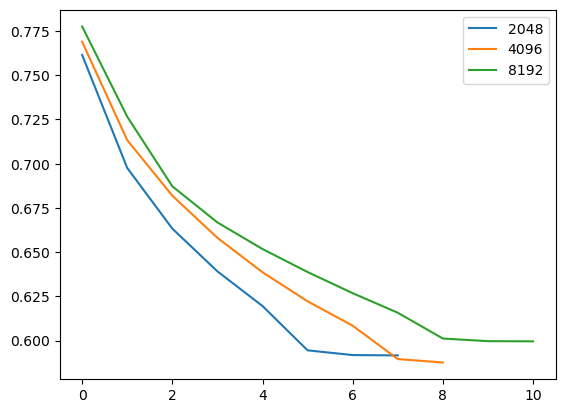

In [97]:
batch_sizes = [2048, 4096, 8192]
from sklearn.metrics import r2_score
for b_s in batch_sizes:
#     loss, acc = evaluation(mod els_bs_1[b_s], X_test, y_test)
    loss, acc = models_bs_1[b_s].evaluate(X_test, y_test)
#     y_pred = (models_bs_1[b_s].predict(X_test)).flatten()
#     print(y_pred)
    models_bs_1[b_s].save(f"my_model models_bs_1{b_s}")
    print(f'loss in the model with batch size = {b_s} is {loss} on test set')
    print(f'MSE of the model with batch size = {b_s} is {acc} on test set')
#     print(f"R2_score of the model with batch size = {b_s} is {r2_score(y_test, y_pred)} on test set")
#     print(f'soft accuracy of the model with batch size = {b_s} is {soft_acc} on test set')
for b_s in batch_sizes:
    plt.plot(histories_bs_1[b_s].history['loss'], label=str(b_s))
    plt.legend()

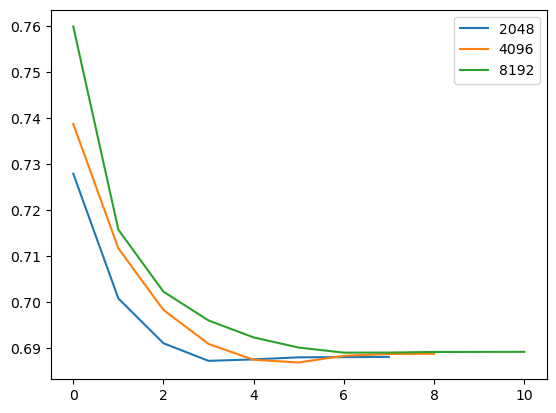

In [98]:
batch_sizes = [2048, 4096, 8192]
for b_s in batch_sizes:
    plt.plot(histories_bs_1[b_s].history['val_loss'], label=str(b_s))
    plt.legend()

In [510]:
# y_predicted = models_bs_1[2048].predict(X_test)

In [511]:
# y_predicted[:20]

In [512]:
# y_test[:20]

In [196]:
# plot the models losses
embedding_sizes = [5, 10, 20, 30, 50, 80, 100, 120, 150, 180, 200]
# embedding_sizes = [50, 80, 100, 150, 200]
models_em_1 = {}
histories_em_1 = {}
for em in embedding_sizes:
    model, history = training_netplain(2048, em, num_users, num_books)
    models_em_1[em] = model
    histories_em_1[em] = history


Epoch 1/60
2089/2089 [==============================] - 5s 2ms/step - loss: 0.7697 - mean_squared_error: 0.7694 - val_loss: 0.7404 - val_mean_squared_error: 0.7394 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 4s 2ms/step - loss: 0.7111 - mean_squared_error: 0.7090 - val_loss: 0.7102 - val_mean_squared_error: 0.7072 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 4s 2ms/step - loss: 0.6819 - mean_squared_error: 0.6781 - val_loss: 0.7007 - val_mean_squared_error: 0.6963 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 4s 2ms/step - loss: 0.6654 - mean_squared_error: 0.6604 - val_loss: 0.6960 - val_mean_squared_error: 0.6906 - lr: 0.0010
Epoch 5/60
2089/2089 [==============================] - 5s 2ms/step - loss: 0.6533 - mean_squared_error: 0.6474 - val_loss: 0.6939 - val_mean_squared_error: 0.6877 - lr: 0.0010
Epoch 6/60
2089/2089 [==============================] - 4s 2ms/step - loss: 0.6441 - mean_squared_error: 0.6375 - v

37131/37131 [==============================] - 15s 407us/step - loss: 0.6934 - mean_squared_error: 0.6872
loss in the model with embedding size = 5 is 0.6933988332748413 on test set
MSE of the model with embedding size = 5 is 0.6871697902679443 on test set
37131/37131 [==============================] - 16s 436us/step - loss: 0.6902 - mean_squared_error: 0.6834
loss in the model with embedding size = 10 is 0.6901534795761108 on test set
MSE of the model with embedding size = 10 is 0.6833551526069641 on test set
37131/37131 [==============================] - 18s 473us/step - loss: 0.6794 - mean_squared_error: 0.6718
loss in the model with embedding size = 20 is 0.6794164180755615 on test set
MSE of the model with embedding size = 20 is 0.6718059778213501 on test set
37131/37131 [==============================] - 19s 509us/step - loss: 0.6742 - mean_squared_error: 0.6647
loss in the model with embedding size = 30 is 0.6741899847984314 on test set
MSE of the model with embedding size = 30 

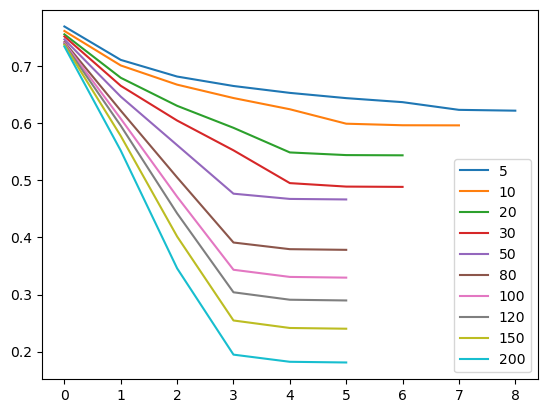

In [203]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100, 120, 150, 200]
for em in embedding_sizes:
    loss, acc = models_em_1[em].evaluate(X_test, y_test)
#     y_pred = (models_em_1[em].predict(X_test)).flatten()
    models_em_1[em].save(f"my_model models_em_1{em}")
#     models_em_1[em].save_weights('path_to_my_weights', save_format='tf')
    print(f'loss in the model with embedding size = {em} is {loss} on test set')
    print(f'MSE of the model with embedding size = {em} is {acc} on test set')
#     print(f"R2_score of the model with embedding size = {em} is {r2_score(y_test, y_pred)} on test set")
for em in embedding_sizes:
    plt.plot(histories_em_1[em].history['loss'], label=str(em))
    plt.legend()

In [ ]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
for em in embedding_sizes:
    plt.plot(histories_em_1[em].history['val_loss'], label=str(em))
    plt.legend()

## Testing NN MF

In [162]:
#plot the models losses
batch_sizes = [2048, 4096, 8192]
models_bs_4 = {}
histories_bs_4 = {}
for b_s in batch_sizes:
    model, history = training_NN(b_s, 10, num_users, num_books)
    models_bs_4[b_s] = model
    histories_bs_4[b_s] = history

Epoch 1/60
2089/2089 [==============================] - 16s 8ms/step - loss: 0.7224 - mean_squared_error: 0.7212 - val_loss: 0.7022 - val_mean_squared_error: 0.6996 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 16s 8ms/step - loss: 0.6733 - mean_squared_error: 0.6693 - val_loss: 0.6851 - val_mean_squared_error: 0.6803 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 16s 8ms/step - loss: 0.6375 - mean_squared_error: 0.6315 - val_loss: 0.6863 - val_mean_squared_error: 0.6797 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 16s 8ms/step - loss: 0.5947 - mean_squared_error: 0.5880 - val_loss: 0.6889 - val_mean_squared_error: 0.6821 - lr: 1.0000e-04
Epoch 5/60
2089/2089 [==============================] - 16s 8ms/step - loss: 0.5869 - mean_squared_error: 0.5801 - val_loss: 0.6895 - val_mean_squared_error: 0.6827 - lr: 1.0000e-05
Epoch 6/60
2089/2089 [==============================] - 16s 8ms/step - loss: 0.5862 - mean_squared_err

37131/37131 [==============================] - 44s 1ms/step - loss: 0.6846 - mean_squared_error: 0.6799
INFO:tensorflow:Assets written to: my_model models_bs_42048/assets
loss in the model with batch size = 2048 is 0.6846275329589844 on test set
MSE of the model with batch size = 2048 is 0.6798559427261353 on test set
37131/37131 [==============================] - 39s 1ms/step - loss: 0.6802 - mean_squared_error: 0.6733
INFO:tensorflow:Assets written to: my_model models_bs_44096/assets
loss in the model with batch size = 4096 is 0.6801639795303345 on test set
MSE of the model with batch size = 4096 is 0.673340380191803 on test set
37131/37131 [==============================] - 40s 1ms/step - loss: 0.6793 - mean_squared_error: 0.6718
INFO:tensorflow:Assets written to: my_model models_bs_48192/assets
loss in the model with batch size = 8192 is 0.6792837977409363 on test set
MSE of the model with batch size = 8192 is 0.67177814245224 on test set


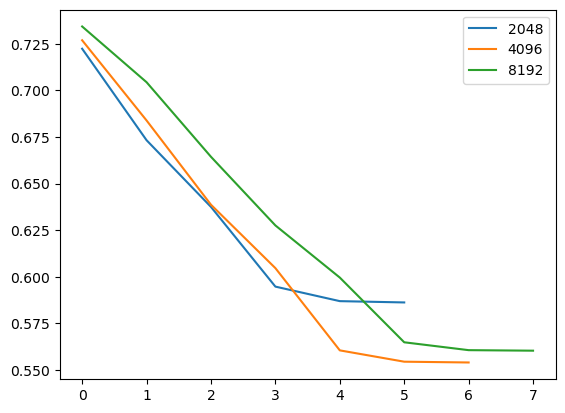

In [163]:
batch_sizes = [2048, 4096, 8192]
from sklearn.metrics import r2_score
for b_s in batch_sizes:
#     loss, acc = evaluation(mod els_bs_1[b_s], X_test, y_test)
    loss, acc = models_bs_4[b_s].evaluate(X_test, y_test)
#     y_pred = (models_bs_1[b_s].predict(X_test)).flatten()
#     print(y_pred)
    models_bs_4[b_s].save(f"my_model models_bs_4{b_s}")
    print(f'loss in the model with batch size = {b_s} is {loss} on test set')
    print(f'MSE of the model with batch size = {b_s} is {acc} on test set')
#     print(f"R2_score of the model with batch size = {b_s} is {r2_score(y_test, y_pred)} on test set")
#     print(f'soft accuracy of the model with batch size = {b_s} is {soft_acc} on test set')
for b_s in batch_sizes:
    plt.plot(histories_bs_4[b_s].history['loss'], label=str(b_s))
    plt.legend()

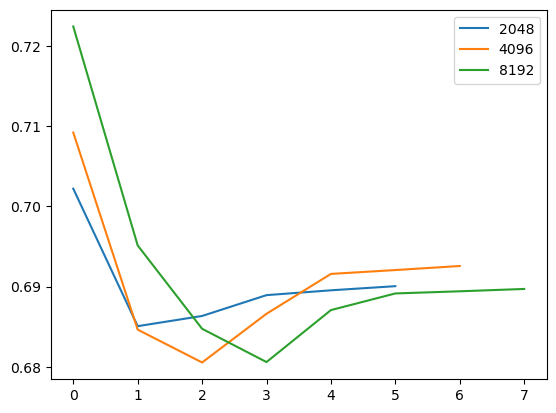

In [164]:
batch_sizes = [2048, 4096, 8192]
for b_s in batch_sizes:
    plt.plot(histories_bs_4[b_s].history['val_loss'], label=str(b_s))
    plt.legend()

In [165]:
# plot the models losses
embedding_sizes = [5, 10, 20, 30, 50, 80, 100, 120, 150, 180, 200]
# embedding_sizes = [50, 80, 100, 150, 200]
models_em_4 = {}
histories_em_4 = {}
for em in embedding_sizes:
    model, history = training_NN(2048, em, num_users, num_books)
    models_em_4[em] = model
    histories_em_4[em] = history

Epoch 1/60
2089/2089 [==============================] - 14s 7ms/step - loss: 0.7259 - mean_squared_error: 0.7253 - val_loss: 0.7065 - val_mean_squared_error: 0.7050 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 14s 7ms/step - loss: 0.6843 - mean_squared_error: 0.6821 - val_loss: 0.6914 - val_mean_squared_error: 0.6888 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 14s 7ms/step - loss: 0.6617 - mean_squared_error: 0.6585 - val_loss: 0.6903 - val_mean_squared_error: 0.6868 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 14s 7ms/step - loss: 0.6502 - mean_squared_error: 0.6459 - val_loss: 0.6874 - val_mean_squared_error: 0.6827 - lr: 0.0010
Epoch 5/60
2089/2089 [==============================] - 14s 7ms/step - loss: 0.6390 - mean_squared_error: 0.6337 - val_loss: 0.6877 - val_mean_squared_error: 0.6822 - lr: 0.0010
Epoch 6/60
2089/2089 [==============================] - 14s 7ms/step - loss: 0.6138 - mean_squared_error: 0.60

37131/37131 [==============================] - 27s 725us/step - loss: 0.6874 - mean_squared_error: 0.6826
INFO:tensorflow:Assets written to: my_model models_em_45/assets
loss in the model with embedding size = 5 is 0.6873806715011597 on test set
MSE of the model with embedding size = 5 is 0.6826319694519043 on test set
37131/37131 [==============================] - 41s 1ms/step - loss: 0.6841 - mean_squared_error: 0.6789
INFO:tensorflow:Assets written to: my_model models_em_410/assets
loss in the model with embedding size = 10 is 0.6841039657592773 on test set
MSE of the model with embedding size = 10 is 0.6789354085922241 on test set
37131/37131 [==============================] - 59s 2ms/step - loss: 0.6806 - mean_squared_error: 0.6715
INFO:tensorflow:Assets written to: my_model models_em_420/assets
loss in the model with embedding size = 20 is 0.6806414723396301 on test set
MSE of the model with embedding size = 20 is 0.6714698672294617 on test set
37131/37131 [======================

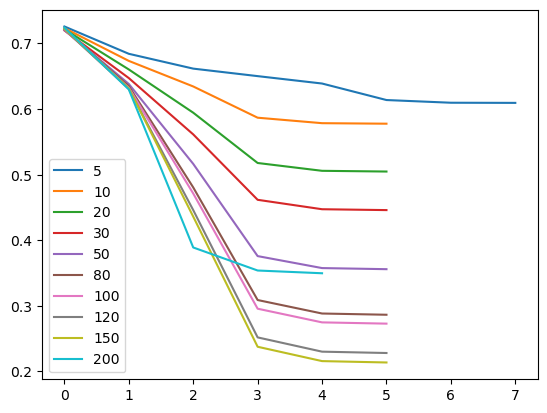

In [166]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100, 120, 150, 200]
for em in embedding_sizes:
    loss, acc = models_em_4[em].evaluate(X_test, y_test)
#     y_pred = (models_em_4[em].predict(X_test)).flatten()
    models_em_4[em].save(f"my_model models_em_4{em}")
    print(f'loss in the model with embedding size = {em} is {loss} on test set')
    print(f'MSE of the model with embedding size = {em} is {acc} on test set')
#     print(f"R2_score of the model with embedding size = {em} is {r2_score(y_test, y_pred)} on test set")
for em in embedding_sizes:
    plt.plot(histories_em_4[em].history['loss'], label=str(em))
    plt.legend()

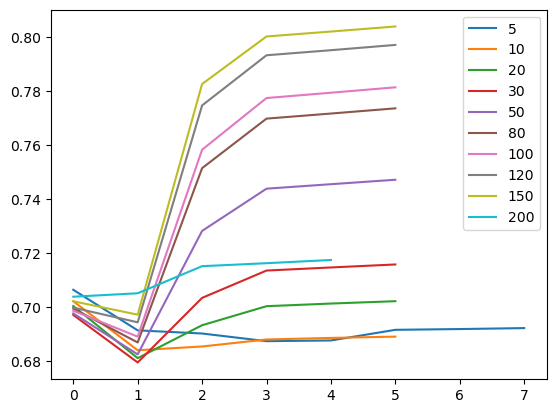

In [167]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100, 120, 150, 200]
for em in embedding_sizes:
    plt.plot(histories_em_4[em].history['val_loss'], label=str(em))
    plt.legend()

## testing different batch sizes and different embedding sizes for the RecommenderNetwithConcatenate which concatenates the embeddings of users and movies, then inputs the concatenation to a dense layer

In [108]:
# #plot the models losses
batch_sizes = [1024, 2048, 4096]
models_bs_2 = {}
histories_bs_2 = {}
for b_s in batch_sizes:
    model, history = training_RecommenderNetwithConcatenate(b_s, 30, num_users, num_books)
    models_bs_2[b_s] = model
    histories_bs_2[b_s] = history


Epoch 1/60
4178/4178 [==============================] - 55s 13ms/step - loss: 0.7298 - mean_squared_error: 0.7277 - val_loss: 0.7284 - val_mean_squared_error: 0.7249 - lr: 0.0010
Epoch 2/60
4178/4178 [==============================] - 54s 13ms/step - loss: 0.7264 - mean_squared_error: 0.7224 - val_loss: 0.7266 - val_mean_squared_error: 0.7222 - lr: 0.0010
Epoch 3/60
4178/4178 [==============================] - 53s 13ms/step - loss: 0.7261 - mean_squared_error: 0.7216 - val_loss: 0.7267 - val_mean_squared_error: 0.7222 - lr: 0.0010
Epoch 4/60
4178/4178 [==============================] - 53s 13ms/step - loss: 0.7210 - mean_squared_error: 0.7167 - val_loss: 0.7255 - val_mean_squared_error: 0.7215 - lr: 1.0000e-04
Epoch 5/60
4178/4178 [==============================] - 52s 12ms/step - loss: 0.7186 - mean_squared_error: 0.7148 - val_loss: 0.7268 - val_mean_squared_error: 0.7232 - lr: 1.0000e-04
Epoch 6/60
4178/4178 [==============================] - 55s 13ms/step - loss: 0.7148 - mean_squar

In [109]:
# model, history = training_RecommenderNetwithConcatenate(b_s, 5, num_users, num_books)
# models_bs_2[1024] = model
# histories_bs_2[1024] = history

37131/37131 [==============================] - 51s 1ms/step - loss: 0.7265 - mean_squared_error: 0.7224
INFO:tensorflow:Assets written to: my_model models_bs_21024/assets
loss in the model with batch size = 1024 is 0.7264505624771118 on test set
MSE of the model with batch size = 1024 is 0.7224452495574951 on test set
37131/37131 [==============================] - 52s 1ms/step - loss: 0.7256 - mean_squared_error: 0.7235
INFO:tensorflow:Assets written to: my_model models_bs_22048/assets
loss in the model with batch size = 2048 is 0.7256414890289307 on test set
MSE of the model with batch size = 2048 is 0.7234898805618286 on test set
37131/37131 [==============================] - 52s 1ms/step - loss: 0.7246 - mean_squared_error: 0.7234
INFO:tensorflow:Assets written to: my_model models_bs_24096/assets
loss in the model with batch size = 4096 is 0.7246343493461609 on test set
MSE of the model with batch size = 4096 is 0.7234028577804565 on test set


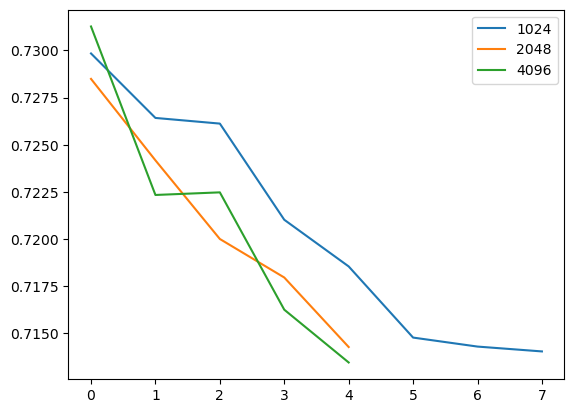

In [110]:
batch_sizes = [1024, 2048, 4096]
for b_s in batch_sizes:
    loss, acc = models_bs_2[b_s].evaluate(X_test, y_test)
#     y_pred = (models_bs_2[b_s].predict(X_test)).flatten()
#     loss2, acc2 = evaluation(models_bs_2[b_s], X_train, y_train)
    models_bs_2[b_s].save(f"my_model models_bs_2{b_s}")
#     print(f"R2_score of the model with batch size = {b_s} is {r2_score(y_test, y_pred)} on test set")
    print(f'loss in the model with batch size = {b_s} is {loss} on test set')
    print(f'MSE of the model with batch size = {b_s} is {acc} on test set')
for b_s in batch_sizes:
    plt.plot(histories_bs_2[b_s].history['loss'], label=str(b_s))
    plt.legend()

In [111]:
# print(y_pred[:20])

In [112]:
# print(y_test[:20])

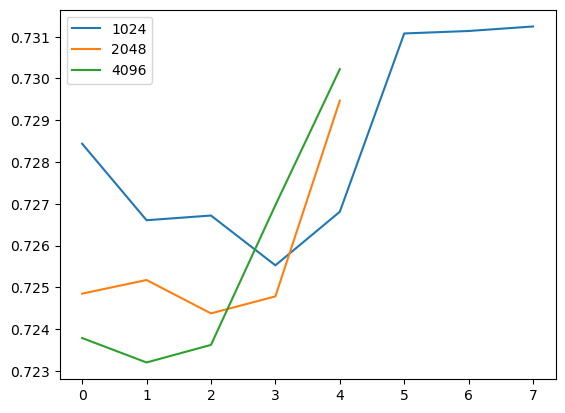

In [113]:
batch_sizes = [1024, 2048, 4096]
for b_s in batch_sizes:
    plt.plot(histories_bs_2[b_s].history['val_loss'], label=str(b_s))
    plt.legend()

In [114]:
# #plot the models losses
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
models_em_2 = {}
histories_em_2 = {}
for em in embedding_sizes:
    model, history = training_RecommenderNetwithConcatenate(4096, em, num_users, num_books)
    models_em_2[em] = model
    histories_em_2[em] = history


Epoch 1/60
1045/1045 [==============================] - 28s 27ms/step - loss: 0.7269 - mean_squared_error: 0.7268 - val_loss: 0.7223 - val_mean_squared_error: 0.7221 - lr: 0.0010
Epoch 2/60
1045/1045 [==============================] - 28s 27ms/step - loss: 0.7208 - mean_squared_error: 0.7205 - val_loss: 0.7216 - val_mean_squared_error: 0.7212 - lr: 0.0010
Epoch 3/60
1045/1045 [==============================] - 28s 27ms/step - loss: 0.7204 - mean_squared_error: 0.7200 - val_loss: 0.7214 - val_mean_squared_error: 0.7209 - lr: 0.0010
Epoch 4/60
1045/1045 [==============================] - 28s 27ms/step - loss: 0.7195 - mean_squared_error: 0.7189 - val_loss: 0.7223 - val_mean_squared_error: 0.7216 - lr: 0.0010
Epoch 5/60
1045/1045 [==============================] - 28s 27ms/step - loss: 0.7127 - mean_squared_error: 0.7120 - val_loss: 0.7285 - val_mean_squared_error: 0.7278 - lr: 1.0000e-04
Epoch 5: early stopping
Epoch 1/60
1045/1045 [==============================] - 29s 27ms/step - loss:

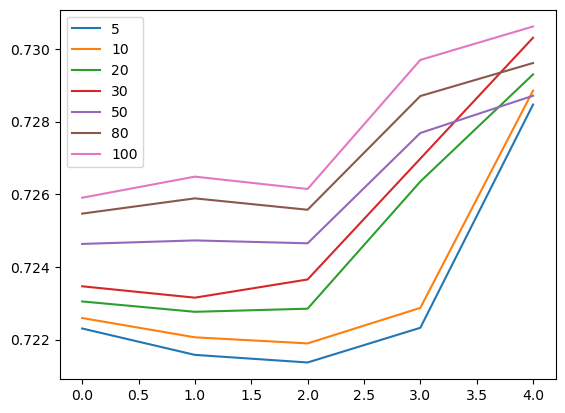

In [115]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
for em in embedding_sizes:
    plt.plot(histories_em_2[em].history['val_loss'], label=str(em))
    plt.legend()


In [116]:
# model, history = training_RecommenderNetwithConcatenate(1024, 20, num_users, num_books)
# models_em_2[20] = model
# histories_em_2[20] = history
# model, history = training_RecommenderNetwithConcatenate(1024, 5, num_users, num_books)
# models_em_2[5] = model
# histories_em_2[5] = history

In [117]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
for em in embedding_sizes:
    loss, acc = models_em_2[em].evaluate(X_test, y_test)
#     y_pred = (models_em_2[em].predict(X_test)).flatten()
#     loss2, acc2 = evaluation(models_em_2[em], X_train, y_train)
    models_em_2[em].save(f"my_model models_em_2{em}")
#     print(f"R2_score of the model with embedding size = {em} is {r2_score(y_test, y_pred)} on test set")
    print(f'loss in the model with embedding size = {em} is {loss} on test set')
    print(f'MSE of the model with embedding size = {em} is {acc} on test set')
# for em in embedding_sizes:
#     embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
#     plt.legend()

37131/37131 [==============================] - 26s 694us/step - loss: 0.7232 - mean_squared_error: 0.7229
INFO:tensorflow:Assets written to: my_model models_em_25/assets
loss in the model with embedding size = 5 is 0.723151445388794 on test set
MSE of the model with embedding size = 5 is 0.7229145765304565 on test set
37131/37131 [==============================] - 29s 794us/step - loss: 0.7234 - mean_squared_error: 0.7230
INFO:tensorflow:Assets written to: my_model models_em_210/assets
loss in the model with embedding size = 10 is 0.7234240770339966 on test set
MSE of the model with embedding size = 10 is 0.7229714393615723 on test set
37131/37131 [==============================] - 42s 1ms/step - loss: 0.7239 - mean_squared_error: 0.7231
INFO:tensorflow:Assets written to: my_model models_em_220/assets
loss in the model with embedding size = 20 is 0.7238695621490479 on test set
MSE of the model with embedding size = 20 is 0.7231124639511108 on test set
37131/37131 [=====================

###### testing different batch sizes and different embedding sizes for the RecommenderNet which calculates the dot product of the embeddings of users and movies, then inputs the concatenation to a neural network of 5 dense layers and 2 dropout layers

In [118]:
#plot the models losses
batch_sizes = [2048, 4096, 8192]
models_bs_3 = {}
histories_bs_3 = {}
for b_s in batch_sizes:
    model, history = training_RecommenderNet(b_s, 30, num_users, num_books)
    models_bs_3[b_s] = model
    histories_bs_3[b_s] = history


Epoch 1/60
2089/2089 [==============================] - 24s 11ms/step - loss: 0.7258 - mean_squared_error: 0.7235 - val_loss: 0.7170 - val_mean_squared_error: 0.7133 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 24s 11ms/step - loss: 0.7077 - mean_squared_error: 0.7030 - val_loss: 0.7081 - val_mean_squared_error: 0.7028 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 24s 11ms/step - loss: 0.6709 - mean_squared_error: 0.6632 - val_loss: 0.6845 - val_mean_squared_error: 0.6745 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 24s 11ms/step - loss: 0.5929 - mean_squared_error: 0.5795 - val_loss: 0.6953 - val_mean_squared_error: 0.6797 - lr: 0.0010
Epoch 5/60
2089/2089 [==============================] - 23s 11ms/step - loss: 0.4876 - mean_squared_error: 0.4716 - val_loss: 0.7057 - val_mean_squared_error: 0.6895 - lr: 1.0000e-04
Epoch 6/60
2089/2089 [==============================] - 24s 11ms/step - loss: 0.4735 - mean_squared_e

37131/37131 [==============================] - 51s 1ms/step - loss: 0.6837 - mean_squared_error: 0.6738
INFO:tensorflow:Assets written to: my_model models_bs_3 2048/assets
loss in the model with batch size = 2048 is 0.6837292909622192 on test set
MSE of the model with batch size = 2048 is 0.6737726926803589 on test set
37131/37131 [==============================] - 51s 1ms/step - loss: 0.6866 - mean_squared_error: 0.6762
INFO:tensorflow:Assets written to: my_model models_bs_3 4096/assets
loss in the model with batch size = 4096 is 0.6866425275802612 on test set
MSE of the model with batch size = 4096 is 0.6762474775314331 on test set
37131/37131 [==============================] - 50s 1ms/step - loss: 0.6906 - mean_squared_error: 0.6803
INFO:tensorflow:Assets written to: my_model models_bs_3 8192/assets
loss in the model with batch size = 8192 is 0.6905919313430786 on test set
MSE of the model with batch size = 8192 is 0.6802740693092346 on test set


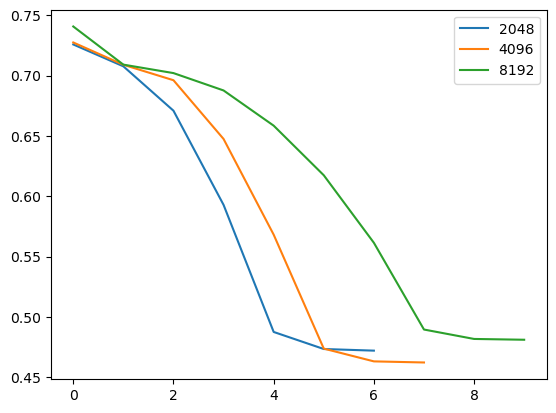

In [119]:
batch_sizes = [2048, 4096, 8192]
for b_s in batch_sizes:
    loss, acc = models_bs_3[b_s].evaluate(X_test, y_test)
    models_bs_3[b_s].save(f"my_model models_bs_3 {b_s}")
#     y_pred = (models_bs_3[b_s].predict(X_test)).flatten()
#     loss2, acc2 = evaluation(models_em_2[em], X_train, y_train)
#     print(f"R2_score of the model with batch size = {b_s} is {r2_score(y_test, y_pred)} on test set")
#     loss2, acc2 = evaluation(models_bs_3[b_s], X_train, y_train)
    print(f'loss in the model with batch size = {b_s} is {loss} on test set')
    print(f'MSE of the model with batch size = {b_s} is {acc} on test set')
for b_s in batch_sizes:
    plt.plot(histories_bs_3[b_s].history['loss'], label=str(b_s))
    plt.legend()

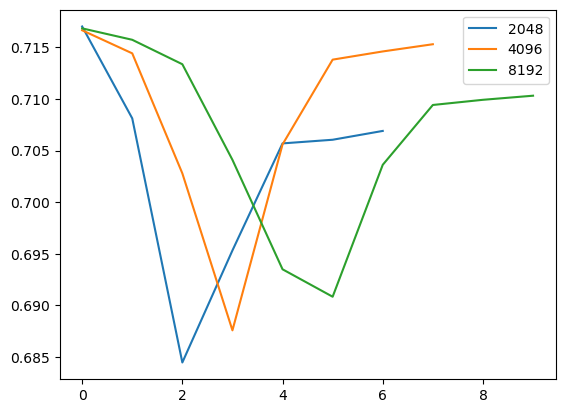

In [120]:
batch_sizes = [2048, 4096, 8192]
for b_s in batch_sizes:
    plt.plot(histories_bs_3[b_s].history['val_loss'], label=str(b_s))
    plt.legend()

In [121]:
model, history = training_RecommenderNet(2048, 10, num_users, num_books)
models_bs_3[2048] = model
histories_bs_3[2048] = history

Epoch 1/60
2089/2089 [==============================] - 18s 8ms/step - loss: 0.7253 - mean_squared_error: 0.7242 - val_loss: 0.7151 - val_mean_squared_error: 0.7131 - lr: 0.0010
Epoch 2/60
2089/2089 [==============================] - 17s 8ms/step - loss: 0.7074 - mean_squared_error: 0.7049 - val_loss: 0.7130 - val_mean_squared_error: 0.7102 - lr: 0.0010
Epoch 3/60
2089/2089 [==============================] - 17s 8ms/step - loss: 0.6981 - mean_squared_error: 0.6948 - val_loss: 0.7055 - val_mean_squared_error: 0.7017 - lr: 0.0010
Epoch 4/60
2089/2089 [==============================] - 17s 8ms/step - loss: 0.6703 - mean_squared_error: 0.6654 - val_loss: 0.6928 - val_mean_squared_error: 0.6871 - lr: 0.0010
Epoch 5/60
2089/2089 [==============================] - 17s 8ms/step - loss: 0.6293 - mean_squared_error: 0.6224 - val_loss: 0.6950 - val_mean_squared_error: 0.6874 - lr: 0.0010
Epoch 6/60
2089/2089 [==============================] - 17s 8ms/step - loss: 0.5792 - mean_squared_error: 0.57

In [122]:
#plot the models losses
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
models_em_3 = {}
histories_em_3 = {}
for em in embedding_sizes:
    model, history = training_RecommenderNet(1024, em, num_users, num_books)
    models_em_3[em] = model
    histories_em_3[em] = history


Epoch 1/60
4178/4178 [==============================] - 22s 5ms/step - loss: 0.7243 - mean_squared_error: 0.7233 - val_loss: 0.7150 - val_mean_squared_error: 0.7134 - lr: 0.0010
Epoch 2/60
4178/4178 [==============================] - 21s 5ms/step - loss: 0.7065 - mean_squared_error: 0.7044 - val_loss: 0.7122 - val_mean_squared_error: 0.7099 - lr: 0.0010
Epoch 3/60
4178/4178 [==============================] - 21s 5ms/step - loss: 0.6949 - mean_squared_error: 0.6920 - val_loss: 0.6996 - val_mean_squared_error: 0.6961 - lr: 0.0010
Epoch 4/60
4178/4178 [==============================] - 21s 5ms/step - loss: 0.6675 - mean_squared_error: 0.6632 - val_loss: 0.6898 - val_mean_squared_error: 0.6850 - lr: 0.0010
Epoch 5/60
4178/4178 [==============================] - 21s 5ms/step - loss: 0.6472 - mean_squared_error: 0.6417 - val_loss: 0.6889 - val_mean_squared_error: 0.6830 - lr: 0.0010
Epoch 6/60
4178/4178 [==============================] - 21s 5ms/step - loss: 0.6361 - mean_squared_error: 0.62

In [123]:
model, history = training_RecommenderNet(4096, 5, num_users, num_books)
models_em_3[5] = model
histories_em_3[5] = history

Epoch 1/60
1045/1045 [==============================] - 14s 13ms/step - loss: 0.7316 - mean_squared_error: 0.7313 - val_loss: 0.7177 - val_mean_squared_error: 0.7169 - lr: 0.0010
Epoch 2/60
1045/1045 [==============================] - 13s 13ms/step - loss: 0.7088 - mean_squared_error: 0.7074 - val_loss: 0.7141 - val_mean_squared_error: 0.7125 - lr: 0.0010
Epoch 3/60
1045/1045 [==============================] - 13s 13ms/step - loss: 0.7013 - mean_squared_error: 0.6994 - val_loss: 0.7140 - val_mean_squared_error: 0.7119 - lr: 0.0010
Epoch 4/60
1045/1045 [==============================] - 13s 13ms/step - loss: 0.6960 - mean_squared_error: 0.6938 - val_loss: 0.7144 - val_mean_squared_error: 0.7121 - lr: 0.0010
Epoch 5/60
1045/1045 [==============================] - 13s 12ms/step - loss: 0.6839 - mean_squared_error: 0.6815 - val_loss: 0.7175 - val_mean_squared_error: 0.7152 - lr: 1.0000e-04
Epoch 6/60
1045/1045 [==============================] - 13s 12ms/step - loss: 0.6816 - mean_squared_e

37131/37131 [==============================] - 24s 638us/step - loss: 0.7147 - mean_squared_error: 0.7130
INFO:tensorflow:Assets written to: my_model models_em_35/assets
loss in the model with em size = 5 is 0.7146950960159302 on test set
MSE of the model with em size = 5 is 0.7130373120307922 on test set
37131/37131 [==============================] - 28s 748us/step - loss: 0.6888 - mean_squared_error: 0.6825
INFO:tensorflow:Assets written to: my_model models_em_310/assets
loss in the model with em size = 10 is 0.6888190507888794 on test set
MSE of the model with em size = 10 is 0.6824937462806702 on test set
37131/37131 [==============================] - 39s 1ms/step - loss: 0.6839 - mean_squared_error: 0.6735
INFO:tensorflow:Assets written to: my_model models_em_320/assets
loss in the model with em size = 20 is 0.6839320063591003 on test set
MSE of the model with em size = 20 is 0.673458456993103 on test set
37131/37131 [==============================] - 51s 1ms/step - loss: 0.6825 -

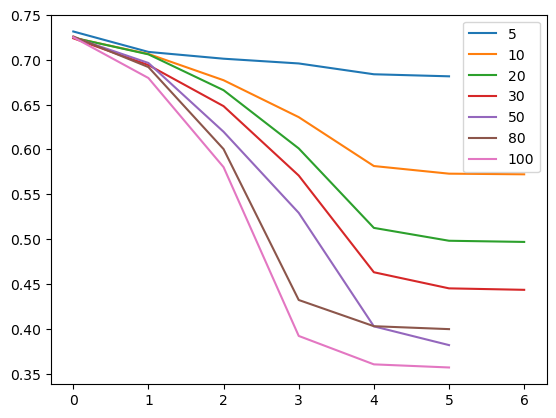

In [124]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
for em in embedding_sizes:
    loss, acc = models_em_3[em].evaluate(X_test, y_test)
#     y_pred = (models_em_3[em].predict(X_test)).flatten()
    models_em_3[em].save(f"my_model models_em_3{em}")
#     loss2, acc2 = evaluation(models_em_3[em], X_train, y_train)
#     print(f"R2_score of the model with em size = {em} is {r2_score(y_test, y_pred)} on test set")
    print(f'loss in the model with em size = {em} is {loss} on test set')
    print(f'MSE of the model with em size = {em} is {acc} on test set')
for em in embedding_sizes:
    plt.plot(histories_em_3[em].history['loss'], label=str(em))
    plt.legend()

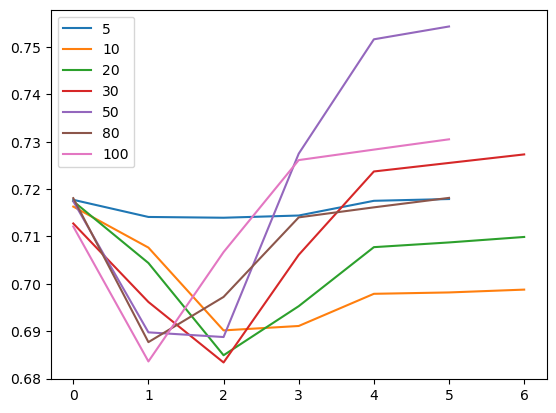

In [125]:
embedding_sizes = [5, 10, 20, 30, 50, 80, 100]
for em in embedding_sizes:
    plt.plot(histories_em_3[em].history['val_loss'], label=str(em))
    plt.legend()

# visualize the different models

In [73]:
from keras.utils.vis_utils import plot_model
batch_sizes1 = [512,1024, 2048, 4096]
embedding_sizes1 = [10, 20, 30, 40, 50]
embedding_sizes2 = [5, 10, 20]
# for em in embedding_sizes2:
# plot_model(models_em_2[5], to_file=f'model_plot{models_em_2[5]}.png', show_shapes=True, show_layer_names=True)
models_em_3[10].summary()
# for em in embedding_sizes1:
#     plot_model(models_em_1[bs], to_file=f'model_plot{models_em_1[em]}.png', show_shapes=True, show_layer_names=True)
#     plot_model(models_em_3[em], to_file=f'model_plot{models_em_3[em]}.png', show_shapes=True, show_layer_names=True)
    

Model: "recommender_net_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_86 (Embedding)    multiple                  524850    
                                                                 
 embedding_87 (Embedding)    multiple                  100000    
                                                                 
 flatten_58 (Flatten)        multiple                  0         
                                                                 
 flatten_59 (Flatten)        multiple                  0         
                                                                 
 multiply_5 (Multiply)       multiple                  0         
                                                                 
 dense_55 (Dense)            multiple                  5208      
                                                                 
 dense_56 (Dense)            multiple            

In [86]:
# !pip install visualkeras
# import visualkeras
# from PIL import ImageFont
# visualkeras.layered_view(models_em_1[10], legend=True) 
# visualkeras.layered_view(models_em_2[5], legend=True
#                     ) 
# visualkeras.layered_view(models_em_3[10], legend=True) 

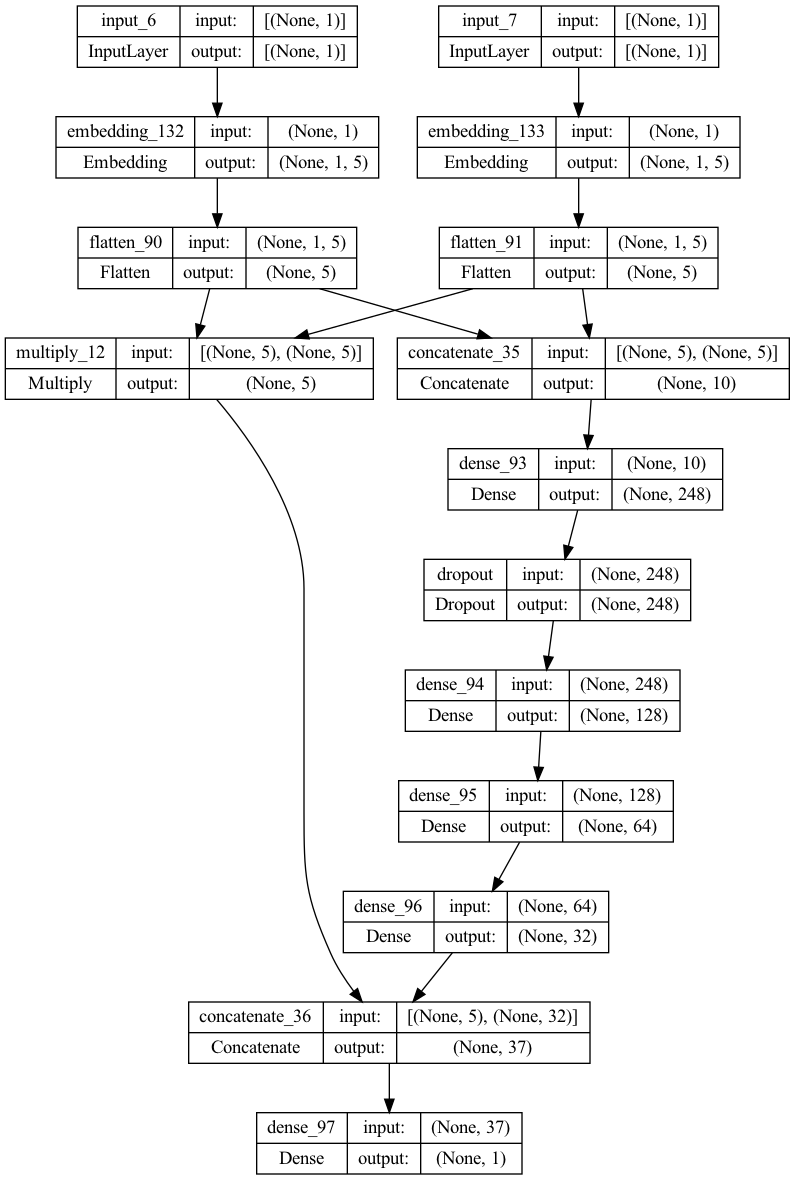

In [124]:
inputs = keras.Input(shape=(2,1))
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(num_users, 10)(u) # (N, 1, K)
m_embedding = Embedding(num_books, 10)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = layers.Concatenate()([u_embedding, m_embedding]) # (N, 2K)
x = layers.Dense(512, activation="tanh")(x)
x = layers.Dense(248, activation="tanh")(x)
x = Dense(1, activation="relu")(x)
model_1 = keras.Model(inputs=(u,m), outputs=x)
# 
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(num_users, 5)(u) # (N, 1, K)
m_embedding = Embedding(num_books, 5)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
x = dot([u_embedding, m_embedding], axes =1) # (N, 2K)
# x = Dense(1)(x)
model_2 = keras.Model(inputs=(u,m), outputs=x)
# 
u = Input(shape=(1,))
m = Input(shape=(1,))
u_embedding = Embedding(num_users, 5)(u) # (N, 1, K)
m_embedding = Embedding(num_books, 5)(m) # (N, 1, K)
u_embedding = Flatten()(u_embedding) # (N, K)
m_embedding = Flatten()(m_embedding) # (N, K)
y = layers.Concatenate()([u_embedding, m_embedding])# (N, 2K)
y = layers.Dense(248, activation="tanh")(y)
y = layers.Dropout(0.5)(y)
y = layers.Dense(128, activation="tanh")(y)
y = layers.Dense(64, activation="sigmoid")(y)
y = layers.Dense(32, activation="sigmoid")(y)
x = layers.Multiply()([u_embedding, m_embedding])
z = layers.Concatenate()([x, y])
z = Dense(1, activation="relu")(z)
model_3 = keras.Model(inputs=(u,m), outputs=z)
# 
#  self.book_flatten = layers.Flatten()
#         self.user_flatten = layers.Flatten()
#         self.multiplied = layers.Multiply()
#         self.dense_1 = layers.Dense(248, activation="tanh")
#         self.dropout1 = layers.Dropout(0.5)
#         self.dense_2 = layers.Dense(128, activation="tanh")
# #         self.dropout2 = layers.Dropout(0.5)
#         self.dense_3 = layers.Dense(64, activation="sigmoid")
#         self.dense_4 = layers.Dense(32, activation="sigmoid")
#         self.dense_5 = layers.Dense(1, activation="relu")
#         self.concatenated1 = layers.Concatenate()
#         self.concatenated2 = layers.Concatenate()
#     def call(self, inputs):
#         user_vector = self.user_embedding(inputs[:, 1])
#         book_vector = self.book_embedding(inputs[:, 0])
#         book_flatten = self.book_flatten(book_vector)
#         user_flatten = self.user_flatten(user_vector)
#         prod = self.multiplied([user_vector, book_vector])
#         concatenated_1 = self.concatenated1([user_flatten, book_flatten])
#         dense_1 = self.dense_1(concatenated_1)
#         dropout1 = self.dropout1(dense_1)
#         dense_2 = self.dense_2(dropout1)
# #         dropout2 = self.dropout2(dense_2)
#         dense_3 = self.dense_3(dense_2)
#         dense_4 = self.dense_4(dense_3)
#         concatenated_2 = self.concatenated2([prod, dense_4])
#         dense_5 = self.dense_5(concatenated_2)
# 
# plot_model(model_1, to_file=f'model_plot_1.png', show_shapes=True, show_layer_names=True)
# plot_model(model_2, to_file=f'model_plot_2.png', show_shapes=True, show_layer_names=True)
plot_model(model_3, to_file=f'model_plot_3.png', show_shapes=True, show_layer_names=True)
# 

In [26]:
book_df_1 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1-100k.csv")
book_df_2 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book100k-200k.csv")
book_df_3 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book200k-300k.csv")
book_df_4 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book400k-500k.csv")
book_df_5 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book500k-600k.csv")
book_df_6 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book600k-700k.csv")
book_df_7 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book700k-800k.csv")
book_df_8 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book800k-900k.csv")
book_df_9 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book900k-1000k.csv")
book_df_10 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1000k-1100k.csv")
book_df_11 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1100k-1200k.csv")
book_df_12 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1200k-1300k.csv")
book_df_13 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1300k-1400k.csv")
book_df_14 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1400k-1500k.csv")
book_df_15 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1500k-1600k.csv")
book_df_16 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1600k-1700k.csv")
book_df_17 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1700k-1800k.csv")
book_df_18 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1800k-1900k.csv")
book_df_19 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book1900k-2000k.csv")
book_df_20 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book2000k-3000k.csv")
book_df_21 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book3000k-4000k.csv")
book_df_22 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book4000k-5000k.csv")
book_df_23 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_0_to_1000.csv")
book_df_24 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_1000_to_2000.csv")
book_df_25 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_2000_to_3000.csv")
book_df_26 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_3000_to_4000.csv")
book_df_27 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_4000_to_5000.csv")
book_df_28 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_5000_to_6000.csv")
book_df_29 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/user_rating_6000_to_11000.csv")
book_df_30 = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/new dataset/archive/book300k-400k.csv")
book_df = pd.concat([book_df_1,book_df_2, book_df_3, book_df_4, book_df_5, book_df_6, book_df_7, book_df_8, book_df_9,
                         book_df_10, book_df_11, book_df_12, book_df_13, book_df_14, book_df_15, book_df_16, book_df_17, book_df_18, book_df_19,
                         book_df_20,book_df_21, book_df_22, book_df_23, book_df_24, book_df_25, book_df_26, book_df_27, book_df_28, book_df_29, book_df_30])

In [76]:
book_df.to_csv("newbooks_2.csv")

In [77]:
book_df.shape

(2212906, 22)

In [70]:
book_df.shape
book_df.drop_duplicates(subset=['Name','Publisher'],keep='first',inplace=True)
book_df.tail()

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,...,Language,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber
280251,4846443,About International Trade,1:0,NaN,4:0,total:0,12,31,Dart Press,0,...,NaN,Nana Haines,0.0,2:0,5:0,187782500X,3:0,NaN,NaN,90.0
280252,4846447,International and Global Marketing: Concepts a...,1:0,NaN,4:0,total:1,1,1,Irwin/McGraw-Hill,0,...,NaN,Taylor W. Meloan,3.0,2:0,5:0,0256218943,3:1,This text is a combination of 32 readings and ...,NaN,439.0
280253,4846448,The Best of Vincent Mulchrone,1:0,NaN,4:0,total:0,5,23,Revel Barker,0,...,NaN,Vincent Mulchrone,0.0,2:0,5:0,0955823811,3:0,Throughout his working life Vincent Mulchrone ...,NaN,120.0
280254,4846449,Forgive Us Our Press Passes,1:0,NaN,4:4,total:10,2,14,Revel Barker,1,...,NaN,Ian Skidmore,3.8,2:0,5:2,0955823803,3:4,"Journalist, broadcaster and author IAN SKIDMOR...",NaN,232.0
280255,4846451,A Fractography Atlas Of Casting Alloys,1:0,NaN,4:1,total:1,1,1,Battelle Press,0,...,NaN,Gordon W. Powell,4.0,2:0,5:0,0935470670,3:0,NaN,NaN,28.0


# we need to save book_df , ratings_df, model_path

In [71]:
def recommend (user_id, book_df, ratings_df, model_path, no_recommendations):
    model = keras.models.load_model(model_path)
    books_read_by_user = ratings_df[ratings_df.user_id == user_id]
    books_not_read = book_df[~book_df["Id"].isin(books_read_by_user.book_id.values)]["Id"]
    #get the books not read that we trained the model on
    books_not_read = list(set(books_not_read).intersection(set(book2book_encoded.keys())))
    books_not_read_encoded = [[book2book_encoded.get(x)] for x in books_not_read]
    user_encoded = user2user_encoded.get(user_id)
    user_book_array = np.hstack(
    ([[user_encoded]] * len(books_not_read_encoded), books_not_read_encoded))
    #user1 book2
    #user1 book4
    #user1 book9
    ratings = model.predict(user_book_array).flatten()
    top_ratings_indices = ratings.argsort()[-1*no_recommendations:][::-1]
    recommended_books_ids = [bookencoded2book.get(books_not_read_encoded[x][0]) for x in top_ratings_indices]
    recommendations = []
    temp = book_df[book_df["Id"].isin(recommended_books_ids)]
    for i in temp.itertuples():
        recommendations.append({"title":i.Name, "author":i.Authors})
        
    print(recommendations)
    return recommendations
    

    

In [ ]:
book2book_encoded
user2user_encoded
bookencoded2book


In [72]:
#test
path = "/Users/ayahassan/Desktop/graduation_project/Untitled Folder/my_model models_em_4150"
recommend(5,book_df,df,path,10)

2023-06-16 23:03:55.475872: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


190/190 [==============================] - 0s 412us/step
[{'title': 'Guts: The True Stories behind Hatchet and the Brian Books', 'author': 'Gary Paulsen'}, {'title': 'The Future of Investment Management', 'author': 'Association for Investment Management an'}, {'title': 'Creating Database-Backed Library Web Pages: Using Open Source Tools', 'author': 'Stephen R. Westman'}, {'title': "Moloka'i (Moloka'i #1)", 'author': 'Alan Brennert'}, {'title': 'Kare First Love, Vol. 10 (Kare First Love, #10)', 'author': 'Kaho Miyasaka'}, {'title': 'The River', 'author': 'Rumer Godden'}, {'title': 'The House of God: Church Architecture, Style and History', 'author': 'Edward Norman'}, {'title': 'Good to Great and the Social Sectors: A Monograph to Accompany Good to Great', 'author': 'James C. Collins'}, {'title': 'Vale: The Illuminati and Their Plans for the Future', 'author': 'Adrian H. Krieg'}, {'title': 'Twister', 'author': 'Michael Crichton'}]


[{'title': 'Guts: The True Stories behind Hatchet and the Brian Books',
  'author': 'Gary Paulsen'},
 {'title': 'The Future of Investment Management',
  'author': 'Association for Investment Management an'},
 {'title': 'Creating Database-Backed Library Web Pages: Using Open Source Tools',
  'author': 'Stephen R. Westman'},
 {'title': "Moloka'i (Moloka'i #1)", 'author': 'Alan Brennert'},
 {'title': 'Kare First Love, Vol. 10 (Kare First Love, #10)',
  'author': 'Kaho Miyasaka'},
 {'title': 'The River', 'author': 'Rumer Godden'},
 {'title': 'The House of God: Church Architecture, Style and History',
  'author': 'Edward Norman'},
 {'title': 'Good to Great and the Social Sectors: A Monograph to Accompany Good to Great',
  'author': 'James C. Collins'},
 {'title': 'Vale: The Illuminati and Their Plans for the Future',
  'author': 'Adrian H. Krieg'},
 {'title': 'Twister', 'author': 'Michael Crichton'}]

In [138]:
# keras.models.load_model("/Users/ayahassan/Desktop/graduation_project/my_model<__main__.RecommenderNetPlain object at 0x7fb4b649d7f0>").summary()

In [29]:
book_df

,Id,Name,RatingDist1,pagesNumber,RatingDist4,RatingDistTotal,PublishMonth,PublishDay,Publisher,CountsOfReview,...,Authors,Rating,RatingDist2,RatingDist5,ISBN,RatingDist3,Description,Count of text reviews,PagesNumber,ID
0,1.0,Harry Potter and the Half-Blood Prince (Harry ...,1:9896,652.0,4:556485,total:2298124,16.0,9.0,Scholastic Inc.,28062.0,...,J.K. Rowling,4.57,2:25317,5:1546466,NaN,3:159960,NaN,NaN,NaN,NaN
1,2.0,Harry Potter and the Order of the Phoenix (Har...,1:12455,870.0,4:604283,total:2358637,1.0,9.0,Scholastic Inc.,29770.0,...,J.K. Rowling,4.5,2:37005,5:1493113,0439358078,3:211781,NaN,NaN,NaN,NaN
2,3.0,Harry Potter and the Sorcerer's Stone (Harry P...,1:108202,309.0,4:1513191,total:6587388,1.0,11.0,Scholastic Inc,75911.0,...,J.K. Rowling,4.47,2:130310,5:4268227,NaN,3:567458,NaN,NaN,NaN,NaN
3,4.0,Harry Potter and the Chamber of Secrets (Harry...,1:11896,352.0,4:706082,total:2560657,1.0,11.0,Scholastic,244.0,...,J.K. Rowling,4.42,2:49353,5:1504505,0439554896,3:288821,NaN,NaN,NaN,NaN
4,5.0,Harry Potter and the Prisoner of Azkaban (Harr...,1:10128,435.0,4:630534,total:2610317,1.0,5.0,Scholastic Inc.,37093.0,...,J.K. Rowling,4.57,2:24849,5:1749958,043965548X,3:194848,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56581,399993.0,Three Pillars of Zen,1:72,400.0,4:1823,total:5440,10.0,7.0,RH Canada UK Dist,0.0,...,Philip Kapleau,4.12,2:192,5:2305,0712619267,3:1048,NaN,NaN,NaN,NaN
56582,399995.0,The Book of Guys,1:37,352.0,4:304,total:944,1.0,9.0,Penguin Books,69.0,...,Garrison Keillor,3.41,2:135,5:145,0140233725,3:323,NaN,NaN,NaN,NaN
56583,399997.0,Lake Wobegon Days,1:212,352.0,4:2545,total:6957,1.0,4.0,Penguin Books,47.0,...,Garrison Keillor,3.63,2:615,5:1454,0140131612,3:2131,NaN,NaN,NaN,NaN
56584,399998.0,Wobegon Boy,1:32,320.0,4:519,total:1469,1.0,11.0,Viking Adult,11.0,...,Garrison Keillor,3.51,2:141,5:216,0670878073,3:561,NaN,NaN,NaN,NaN


In [83]:
df_temp = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/raw.githubusercontent.com_kart-projects_Goodreads-books_master_books.csv")

ParserError: Error tokenizing data. C error: Expected 10 fields in line 4012, saw 11


In [72]:
df

,user_id,book_id,rating,Id
0,1,258,5,258
1,2,4081,4,4081
2,2,260,5,260
3,2,9296,5,9296
4,2,2318,3,2318
...,...,...,...,...
5976474,49925,510,5,510
5976475,49925,528,4,528
5976476,49925,722,4,722
5976477,49925,949,5,949


In [82]:
df_temp.shape

(99, 23)

In [65]:
df_temp["Id"] = df_temp["book_id"]

In [66]:
df["Id"]=df["book_id"]

In [76]:
s1 = pd.merge(df,df_temp, how='inner', on=["Id"])

In [79]:
len(s1["Id"].unique())

99

# Recommend to a new user

In [204]:
# def get_model():
#      return RecommenderNetPlain(num_users = 52485, num_books = 10000, embedding_size = 150)

In [72]:
model_1_path = "/Users/ayahassan/Desktop/graduation_project/Untitled Folder/model_net_plain_2"
# model_1 = get_model()
# model_1.compile(loss=tf.keras.losses.MeanSquaredError(),
#         optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
#         metrics = [tf.keras.metrics.MeanSquaredError(
#             name="mean_squared_error", dtype=None)])
# model_1.train_on_batch(X_train, y_train)
# model_1.load_weights(model_1_path)
model_1 = keras.models.load_model(model_1_path)
model_1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 1, 150)       8013600     ['input_15[0][0]']               
                                                                                                  
 embedding_15 (Embedding)       (None, 1, 150)       1500000     ['input_16[0][0]']               
                                                                                            

In [163]:
model_1_path = "/Users/ayahassan/Desktop/graduation_project/Untitled Folder/model_net_plain_2"
def my_load_model(model_1_path):
    return keras.models.load_model(model_1_path)

def model_2_function(model):
    model_2 = tf.keras.Model(inputs = model.get_layer('embedding_15').input, outputs = model.get_layer('flatten_15').output)
    model_2.compile(loss=tf.keras.losses.MeanSquaredError(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        metrics = [tf.keras.metrics.MeanSquaredError(
            name="mean_squared_error", dtype=None)], run_eagerly=True)
    return model_2
# class model2(keras.Model):
#     def __init__(self):
#         super(model2, self).__init__()
#         model_1 = load_model(model_1_path)
#         self.book_embeddings_1 = model_1.get_layer("embedding_47").output

#     def call(self, inputs):
#         book_embeddings_1 = self.book_embeddings_1(model_1.get_layer("embedding_46").input)
#         return book_embeddings_1

In [192]:
model_1 = my_load_model("/Users/ayahassan/Desktop/graduation_project/Untitled Folder/model_net_plain_2")
model_1.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 input_16 (InputLayer)          [(None, 1)]          0           []                               
                                                                                                  
 embedding_14 (Embedding)       (None, 1, 150)       8013600     ['input_15[0][0]']               
                                                                                                  
 embedding_15 (Embedding)       (None, 1, 150)       1500000     ['input_16[0][0]']               
                                                                                            

In [164]:
model_2 = model_2_function(my_load_model(model_1_path))

In [165]:
model_2.save("model_2_for_website")

INFO:tensorflow:Assets written to: model_2_for_website/assets


In [166]:
model_2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 1)]               0         
                                                                 
 embedding_15 (Embedding)    (None, 1, 150)            1500000   
                                                                 
 flatten_15 (Flatten)        (None, 150)               0         
                                                                 
Total params: 1,500,000
Trainable params: 1,500,000
Non-trainable params: 0
_________________________________________________________________


In [280]:
book_df = pd.read_csv("/Users/ayahassan/Desktop/graduation_project/books_new.csv")

In [281]:
book_df

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7130616,7130616,7392860,19,441019455,9.780441e+12,Ilona Andrews,2010.0,Bayou Moon,...,17204,18856,1180,105,575,3538,7860,6778,https://images.gr-assets.com/books/1307445460m...,https://images.gr-assets.com/books/1307445460s...
9996,9997,208324,208324,1084709,19,067973371X,9.780680e+12,Robert A. Caro,1990.0,Means of Ascent,...,12582,12952,395,303,551,1737,3389,6972,https://s.gr-assets.com/assets/nophoto/book/11...,https://s.gr-assets.com/assets/nophoto/book/50...
9997,9998,77431,77431,2393986,60,039330762X,9.780393e+12,Patrick O'Brian,1977.0,The Mauritius Command,...,9421,10733,374,11,111,1191,4240,5180,https://images.gr-assets.com/books/1455373531m...,https://images.gr-assets.com/books/1455373531s...
9998,9999,8565083,8565083,13433613,7,61711527,9.780062e+12,Peggy Orenstein,2011.0,Cinderella Ate My Daughter: Dispatches from th...,...,11279,11994,1988,275,1002,3765,4577,2375,https://images.gr-assets.com/books/1279214118m...,https://images.gr-assets.com/books/1279214118s...


In [ ]:
def my_load_model(model_1_path):
    return keras.models.load_model(model_1_path)

In [295]:
def get_new_user_book_embeddings(book_df, model1_path, model2_path, user_books,  no_recommendations, embedding_layer_size= 150):
    books_list = list(user_books.keys())
    print(books_list)
    books_ids_list = book_df[book_df["title"].isin(books_list)]["book_id"].values.tolist()
    print(books_ids_list)

    model_2  = my_load_model(model2_path)
    model_1  = my_load_model(model1_path)
#     books_not_read_encoded = [[book2book_encoded.get(x)] for x in books_not_read]
    books_ids_list_encoded = [[book2book_encoded.get(x)] for x in books_ids_list]
    print(books_ids_list_encoded)

    books_ids_list_encoded = np.asarray(books_ids_list_encoded).astype('float32')
    print(books_ids_list_encoded)
    user_books_embeddings = model_2.predict(books_ids_list_encoded)
    user_books_embeddings = user_books_embeddings.reshape(len(user_books), embedding_layer_size)
    user_book_ratings = np.zeros(len(user_books))
    usr_books_keys =  list(user_books.keys())
    i = 0
    for index in range(len(user_books)):
        user_book_ratings[index] = user_books[usr_books_keys[i]]
        i += 1
    user_embedding, residuals, rank, s = np.linalg.lstsq(user_books_embeddings,user_book_ratings, rcond=-1) # Get embedding for new user
    user_embedding = user_embedding.reshape(1, embedding_layer_size) # User embedding based on choices of user
    user_embedding = np.squeeze(user_embedding)
    books_embeddings = model_1.get_layer('embedding_15').get_weights()
    books_embeddings = np.array(books_embeddings)
    books_embeddings = np.squeeze(books_embeddings)
    print(np.shape(books_embeddings))
    print(f"user embedding shape: {user_embedding.shape}")
    predicted_ratings = np.matmul(books_embeddings, user_embedding)
    predicted_dict = {}
    predicted_dict_2 = {}
    predicted_dict_temp = {}

    i = 0
    for rating in predicted_ratings:
#         if i not in books_ids_list: 
        predicted_dict[i] = rating
        i+=1
    temp_keys = [bookencoded2book.get(x) for x in predicted_dict.keys()]
    print(type(temp_keys))
    i = 0
    for key in predicted_dict:
        predicted_dict_temp[temp_keys[i]] = predicted_dict[key]
        i+=1
    for key in predicted_dict_temp:
        if key not in books_ids_list: 
            predicted_dict_2[key] = predicted_dict_temp[key]
    sorted_predicted_dict = sorted(predicted_dict_2.items(), key=lambda x:x[1], reverse = True)[:no_recommendations]
    print(sorted_predicted_dict)
    print(np.array(sorted_predicted_dict).shape)
    sorted_predicted_dict = dict(list(sorted_predicted_dict))
    print(sorted_predicted_dict.keys())
    temp = book_df[book_df["book_id"].isin (sorted_predicted_dict.keys())]
    print(temp.shape)
    recommendations = []
    for i in temp.itertuples():
        recommendations.append({"title":i.title, "author":i.authors})
    print(recommendations)
    return recommendations   
    

In [297]:
model_2_path = "/Users/ayahassan/Desktop/graduation_project/Untitled Folder/model_2_for_website"
user_profile = {"The Fault in Our Stars":5, "Pride and Prejudice": 4, "Little Women (Little Women, #1)": 3}
get_new_user_book_embeddings(book_df,model_1_path ,model_2_path, user_profile, 30)

['The Fault in Our Stars', 'Pride and Prejudice', 'Little Women (Little Women, #1)']
[6, 10, 42]
[[5], [9], [41]]
[[ 5.]
 [ 9.]
 [41.]]
1/1 [==============================] - 0s 18ms/step
(10000, 150)
user embedding shape: (150,)
<class 'list'>
[(76, 2.4727552671505153), (43, 2.213858870773483), (47, 2.1139119457889137), (4653, 1.7329417563029397), (339, 1.7175150843164637), (164, 1.6358187799124586), (12, 1.5672617247455687), (464, 1.4943620927324988), (133, 1.4913210307863662), (267, 1.3880052016982862), (1577, 1.3832380677178593), (950, 1.378908063581671), (493, 1.3781422699337031), (1499, 1.3521239032916499), (112, 1.331487949033498), (1180, 1.3250736078106002), (171, 1.3191391377136226), (230, 1.2978219499035717), (740, 1.2943344013939324), (1338, 1.2411963938419528), (626, 1.2411351144045448), (250, 1.229197562506978), (143, 1.2206364746573821), (2538, 1.2204297449291046), (29, 1.2163832279647), (4346, 1.1975406250274432), (31, 1.194035231881588), (109, 1.1797779812678382), (681,

[{'title': 'Divergent (Divergent, #1)', 'author': 'Veronica Roth'},
 {'title': 'Romeo and Juliet',
  'author': 'William Shakespeare, Robert           Jackson'},
 {'title': 'The Help', 'author': 'Kathryn Stockett'},
 {'title': 'Jane Eyre', 'author': 'Charlotte Brontë, Michael Mason'},
 {'title': 'The Book Thief', 'author': 'Markus Zusak'},
 {'title': 'Sense and Sensibility',
  'author': 'Jane Austen, Tony Tanner, Ros Ballaster'},
 {'title': 'Les Misérables',
  'author': 'Victor Hugo, Lee Fahnestock, Norman MacAfee'},
 {'title': 'Me Before You (Me Before You, #1)', 'author': 'Jojo Moyes'},
 {'title': 'Anne of Green Gables (Anne of Green Gables, #1)',
  'author': 'L.M. Montgomery'},
 {'title': 'All the Light We Cannot See', 'author': 'Anthony Doerr'},
 {'title': 'Eleanor & Park', 'author': 'Rainbow Rowell'},
 {'title': 'Emma', 'author': 'Jane Austen, Fiona Stafford'},
 {'title': 'Persuasion',
  'author': 'Jane Austen, James Kinsley, Deidre Shauna Lynch'},
 {'title': 'Wonder', 'author': 'R

In [285]:
#     model = keras.models.load_model(model_path)
#     books_read_by_user = ratings_df[ratings_df.user_id == user_id]
#     books_not_read = book_df[~book_df["Id"].isin(books_read_by_user.book_id.values)]["Id"]
#     #get the books not read that we trained the model on
#     books_not_read = list(set(books_not_read).intersection(set(book2book_encoded.keys())))
#     books_not_read_encoded = [[book2book_encoded.get(x)] for x in books_not_read]
#     user_encoded = user2user_encoded.get(user_id)
#     user_book_array = np.hstack(
#     ([[user_encoded]] * len(books_not_read_encoded), books_not_read_encoded))
#     #user1 book2
#     #user1 book4
#     #user1 book9
#     ratings = model.predict(user_book_array).flatten()
#     top_ratings_indices = ratings.argsort()[-1*no_recommendations:][::-1]
#     recommended_books_ids = [bookencoded2book.get(books_not_read_encoded[x][0]) for x in top_ratings_indices]
#     recommendations = []
#     temp = book_df[book_df["Id"].isin(recommended_books_ids)]
#     for i in temp.itertuples():
#         recommendations.append({"title":i.Name, "author":i.Authors})
        
#     print(recommendations)
#     return recommendations